# Unsupervised Clustering to Characterize Customers for Targeted Marketing 

**Introduction and Problem Statement**

Customer Personality Analysis needs to be performed in detail, and often, of a company’s customers. It helps a business to better understand its customers and update products and services according to the specific needs, behaviors, capacities, and concerns of different types of customers. Ultimately these exercises help a business to appropriately refine its business strategy. 

The goal is to group customers based on their attributes, identify the most dominant customer segment and their behavior while also identify the potential area of expansion.  For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment. In addition, if a specific service is valued by a smaller group of customers with more purchasing power then that could be a potential area of expansion.

## Data Description

Detailed data dictionary is given below.
  
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

PRODUCTS

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

PROMOTIONS

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

PLACE

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month


## Importing libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building, if needed
from sklearn.linear_model import LogisticRegression

# For scaling the data using z-score
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


#For Hierarchical Clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering 

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import metrics

from sklearn.manifold import TSNE
import time
!pip install umap-learn
import umap
from mpl_toolkits.mplot3d import Axes3D

# to compute distances
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

# to perform PCA
from sklearn.decomposition import PCA

from scipy import stats
from datetime import datetime

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")




[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


## Loading Data

In [2]:
#Importing the dataset with this specific seperator due to the nature of thee csv file with tab separated
df = pd.read_csv("marketing_campaign.csv", sep='\t') 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
#let's see feature size
df.shape

(2240, 29)

## Data Overview

- Observations
- Sanity checks

In [5]:
pd.set_option('display.max_columns', None) # for seeing all columns in a large number of features
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [6]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

* Some need to be combined, all of them need to be changed to numerical data for modeling use

In [7]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [8]:
df['Dt_Customer'].value_counts()

31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 663, dtype: int64

In [9]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("Date of registration of the company's newest client:",max(dates))
print("Date of registration of the company's oldest client:",min(dates))

Date of registration of the company's newest client: 2014-12-06
Date of registration of the company's oldest client: 2012-01-08


* Dates need to be processed to datetime format, extract useful data (how long been a member) for modeling use.
* So, new feature will need to be generated.

### Feature Generation

In [10]:
#Creating a copy of data
df0 = df.copy()


In [11]:
 # Customer Age
df0['Age'] = datetime.now().year - df0['Year_Birth'] 

In [12]:
# Number of years since customer registration
def reg_year():
    regyear = pd.to_datetime(df0['Dt_Customer'], format='%d-%m-%Y').apply(lambda x:x.year)
    curryear = datetime.now().year
    return curryear - regyear

df0['yr_fm_reg']= reg_year()

In [13]:
df0['yr_fm_reg'].value_counts()

10    1189
9      557
11     494
Name: yr_fm_reg, dtype: int64

* As the new data is now how many years since registration, is a numeric number its usable in modeling.
* These are also consistent with current understanding that two three years of customer data 2012-2014 were available. 

In [14]:
# Encoded education in numbers in order
df0["Education"] = df0["Education"].replace({"Basic": 0, "Graduation": 1, "2n Cycle": 2, "Master": 2, "PhD": 3})


In [15]:
df0['Education'].value_counts()

1    1127
2     573
3     486
0      54
Name: Education, dtype: int64

In [16]:
# Separate features for Alone and Partner
df0['Marital_Status'] = df0["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone",
    "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})


df0 = pd.concat([df0, pd.get_dummies(df0['Marital_Status'])], axis=1) 

In [17]:
df0['Marital_Status'].value_counts()

Partner    1444
Alone       796
Name: Marital_Status, dtype: int64

In [18]:
#Feature indicating total children living in the household
df0["Num_Children"]=df0["Kidhome"]+df0["Teenhome"]

In [19]:
df0['Num_Children'].value_counts()

1    1128
0     638
2     421
3      53
Name: Num_Children, dtype: int64

In [20]:
# Total number of people in the family

df0["Family_Size"] = df0['Marital_Status'].replace({'Alone': 1, 'Partner': 2}) + df0["Num_Children"]

In [21]:
df0['Family_Size'].value_counts()

3    889
2    764
4    301
1    254
5     32
Name: Family_Size, dtype: int64

In [22]:
df0['Marital_Status'].value_counts()

Partner    1444
Alone       796
Name: Marital_Status, dtype: int64

In [23]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   int64         
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [24]:
# Feature that shows the amount spent on products by customers
df0['tot_spent']=df0['MntWines']+df0["MntFruits"]+df0['MntMeatProducts']+df0['MntFishProducts']+df0['MntSweetProducts']+df0["MntGoldProds"]

In [25]:
# Feature that shows the number of customers accepted the offer in campaign 
df0['cmp_accept']=df0['AcceptedCmp1']+df0["AcceptedCmp2"]+df0['AcceptedCmp3']+df0['AcceptedCmp4']+df0['AcceptedCmp5']+df0["Response"]

In [26]:
# Feature that shows the total purchases made by customers
df0['tot_purch']=df0['NumWebPurchases']+df0["NumCatalogPurchases"]+df0['NumStorePurchases']

In [27]:
df0.head()

ID  Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          1          Alone  58138.0        0         0   
1  2174        1954          1          Alone  46344.0        1         1   
2  4141        1965          1        Partner  71613.0        0         0   
3  6182        1984          1        Partner  26646.0        1         0   
4  5324        1981          3        Partner  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Age  yr_fm_reg  Alone  Partner  \
0              3         11         1   66         11      1        0   
1              3         11         0   69          9      1        0   
2              3         11         0   58         10      0        1   
3              3         11         0   39          9      0        1   
4              3         11         0   42          9      0        1   

   Num_Children  Family_Size  tot_spent  cmp_accept  tot_purch  
0             0            1       1617           1         22  
1             2            3         27           0          4  
2             0            2        776           0         20  
3             1            3         53           0          6  
4             1            3        422           0         14

#### Summary of feature generation
* Several feature's attributes were combined meaningfully, e.g., single marital status.
* New features were generated to reflect, status in a numeric entity which also reflects ranking.
* Now lets check if further cleaning, e.g., dropping duplicated or already represented features, treat missing values, etc.


## Data cleaning

* Check missing value
* Deal with missing value
* Drop unnecessary columns
* Check data type of all columns

In [28]:
df0.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
yr_fm_reg               0
Alone                   0
Partner                 0
Num_Children            0
Family_Size             0
tot_spent               0
cmp_accept              0
tot_purch               0
dtype: int64

* Income feature has several missing values. 
* Since this is a continuous data we can fill in with average or median. I chose median becasue it is less affected by outliers.

In [29]:
df0['Income'].fillna(int(df0['Income'].median()), inplace=True)

In [30]:
df0.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
yr_fm_reg              0
Alone                  0
Partner                0
Num_Children           0
Family_Size            0
tot_spent              0
cmp_accept             0
tot_purch              0
dtype: int64

In [31]:
df0.shape

(2240, 38)

In [32]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   int64         
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [33]:
df0['Alone'].value_counts()

0    1444
1     796
Name: Alone, dtype: int64

### Outlier Detection

In [34]:
df1=df0.copy()

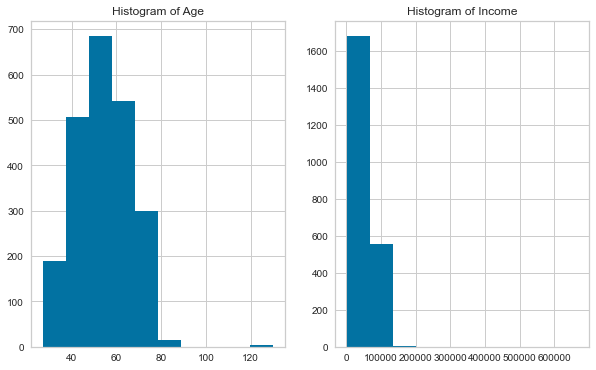

In [35]:
plt.figure(figsize = (10,6))
plt.rcParams['font.size'] = 8

plt.subplot(1,2,1)
plt.hist(df1["Age"])
plt.title("Histogram of Age")

plt.subplot(1,2,2)
plt.hist(df1["Income"])
plt.title("Histogram of Income")

plt.show()

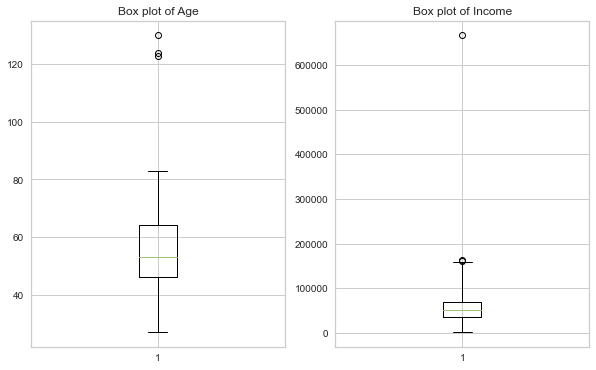

In [36]:
plt.figure(figsize = (10,6))
plt.rcParams['font.size'] = 8

plt.subplot(1,2,1)
plt.boxplot(df1['Age'], whis = 1.5)
plt.title("Box plot of Age")

plt.subplot(1,2,2)
plt.boxplot(df1['Income'], whis = 2.8)
plt.title("Box plot of Income")

plt.show()

In [37]:
from scipy.stats.mstats import winsorize

In [38]:
df1['win_Age'] = winsorize(df1["Age"], (0.0, 0.005))

df1['win_Income'] = winsorize(df1["Income"], (0.0, 0.005))

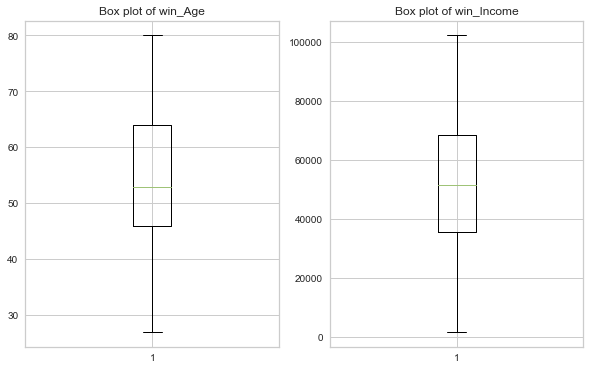

In [39]:
plt.figure(figsize = (10,6))
plt.rcParams['font.size'] = 8

plt.subplot(1,2,1)
plt.boxplot(df1['win_Age'])
plt.title("Box plot of win_Age")

plt.subplot(1,2,2)
plt.boxplot(df1['win_Income'])
plt.title("Box plot of win_Income")

plt.show()

#### Lets drop the columns that are not necessary including those with the outliers

In [40]:
df2=df1.copy()

In [41]:
# Drop columns.
df2= df2.drop(columns=['ID', 'Year_Birth', 'Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Alone','Age', 'Income'])

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   int64  
 1   Kidhome              2240 non-null   int64  
 2   Teenhome             2240 non-null   int64  
 3   Recency              2240 non-null   int64  
 4   MntWines             2240 non-null   int64  
 5   MntFruits            2240 non-null   int64  
 6   MntMeatProducts      2240 non-null   int64  
 7   MntFishProducts      2240 non-null   int64  
 8   MntSweetProducts     2240 non-null   int64  
 9   MntGoldProds         2240 non-null   int64  
 10  NumDealsPurchases    2240 non-null   int64  
 11  NumWebPurchases      2240 non-null   int64  
 12  NumCatalogPurchases  2240 non-null   int64  
 13  NumStorePurchases    2240 non-null   int64  
 14  NumWebVisitsMonth    2240 non-null   int64  
 15  AcceptedCmp3         2240 non-null   i

###  Summary of data treatment
* Now that a lot of correction, treatment and feature generation is done, lets make a correlation coefficient heatmap. 
* It will tell us which features we have.
* It will also tell us which features may be related and duplicated if any.
* If two features are found with high correlation coefficient, then one feature was dropped.

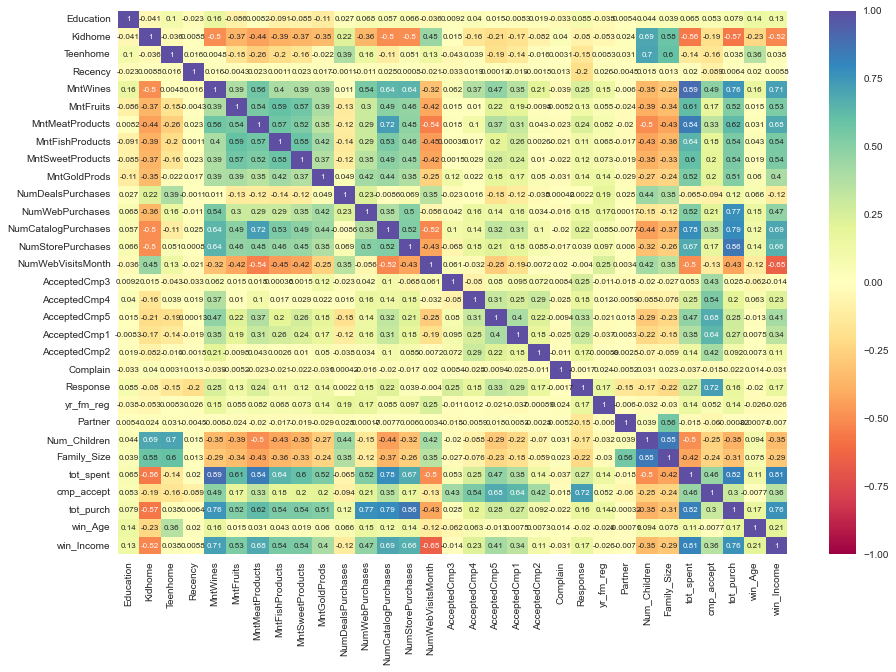

In [43]:
plt.figure(figsize=(15, 10))
sns.heatmap(df2.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

## Exploratory Data Analysis (EDA)

In [44]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [45]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=0, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 3),
            textcoords="offset points",
        )  # annotate the percentage
        
    # Adjust the font size of the tick labels
        ax.tick_params(labelsize=10)
   

    plt.show()  # show the plot
    

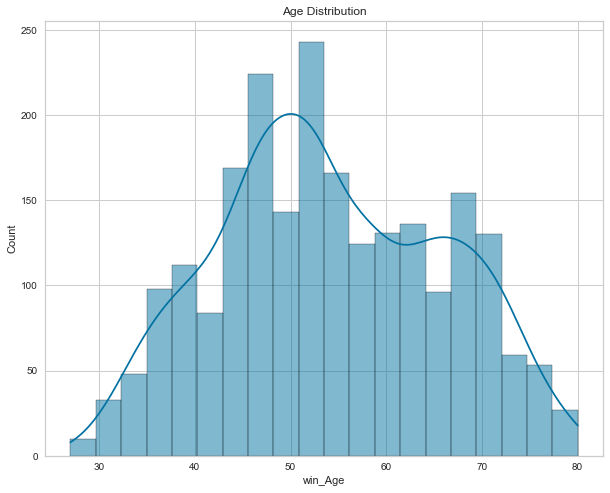

In [46]:
plt.figure(figsize = (10,8))
sns.histplot(data = df2['win_Age'], kde = True)
plt.title('Age Distribution');

* Age of the customers ranges from ~28-80yrs, with mode of the data at age ~53yrs.
* Good distribution of data, nothing looks incorrect.

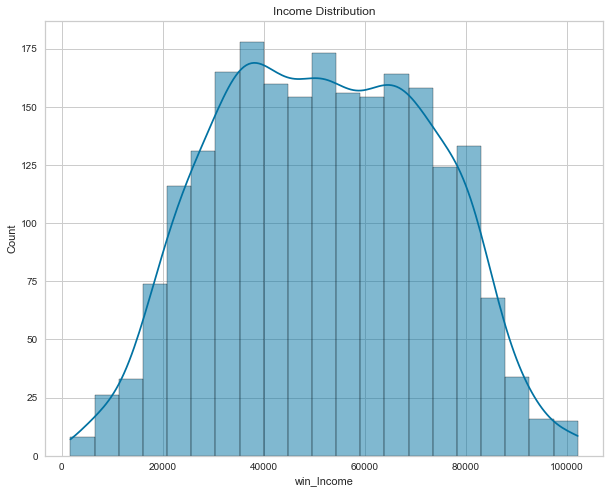

In [47]:
plt.figure(figsize = (10,8))
sns.histplot(data = df2['win_Income'], kde = True)
plt.title('Income Distribution');

* Most represented income range is from ~30000 to ~70000. 

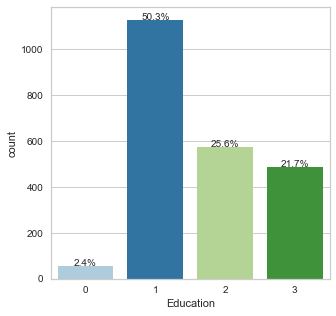

In [48]:
labeled_barplot(df2, "Education", perc=True)

* Graduation = 50.3%; 2nCycle and Master = 25.6%, PhD= 21.7% and Basic =2.3%
* This do look like a general population nothing significantly incorrect

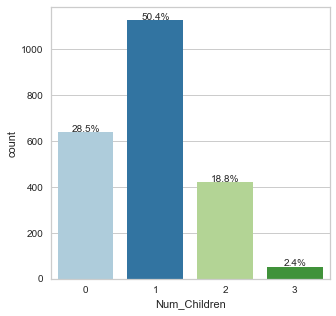

In [49]:
labeled_barplot(df2, "Num_Children", perc=True)

* 50% of the population comprises of 1 kid, followed by no kid (28.5%)

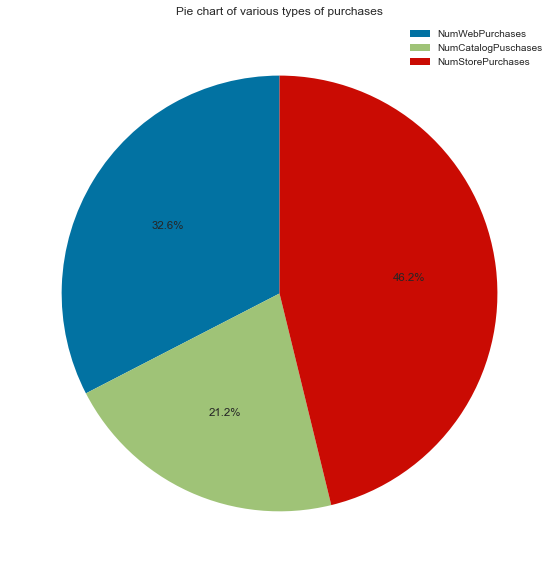

In [50]:
Purchases = ['NumWebPurchases', 'NumCatalogPuschases', 'NumStorePurchases']
NumPurchases = [df2['NumWebPurchases'].sum(), df2['NumCatalogPurchases'].sum(),df2['NumStorePurchases'].sum()]
plt.figure(figsize = (10,8))
plt.pie(NumPurchases, autopct = '%1.1f%%', textprops={'size': 'x-large'}, startangle = 90)
plt.legend(Purchases, loc = 'upper right')
plt.title('Pie chart of various types of purchases')
plt.tight_layout()
plt.show();

* Most of the purchases were made directly in stores (46.2%).

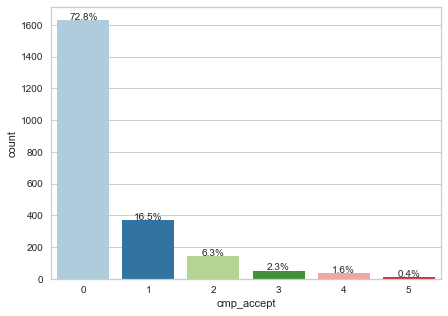

In [51]:
labeled_barplot(df2, "cmp_accept", perc=True)

* Customers who did not accept any offer is the largest group of population (72.8%)

In [52]:
df2['cmp_accept'].value_counts()

0    1631
1     370
2     142
3      51
4      36
5      10
Name: cmp_accept, dtype: int64

* There is no relationship between age and income.
* Adding the education also did not help to find a correlation. This is a bit unexpected. Expectations were that younger population making much hire income probably have higher education, but that is not true in this dataset.

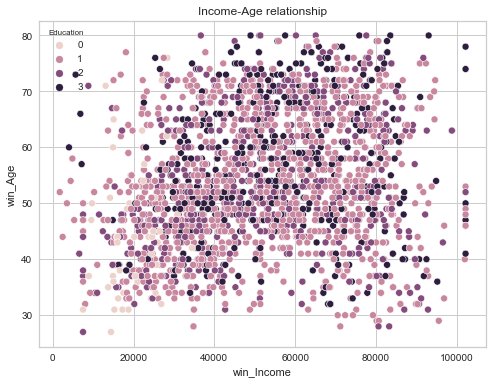

In [53]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df2, x = 'win_Income', y = 'win_Age', hue='Education')
plt.title('Income-Age relationship');

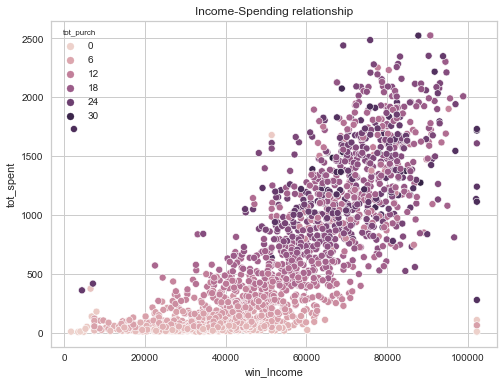

In [54]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df2, x = 'win_Income', y = 'tot_spent', hue='tot_purch')
plt.title('Income-Spending relationship');

* People  with higher income have spent more, and also made more purchases.

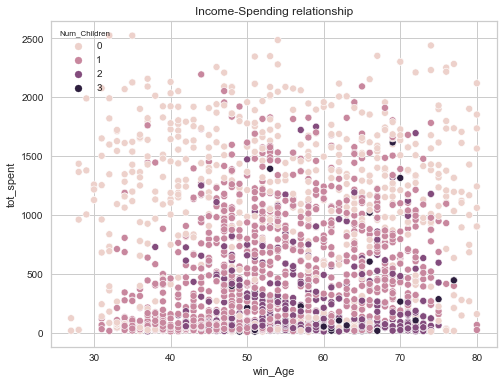

In [55]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df2, x = 'win_Age', y = 'tot_spent', hue='Num_Children')
plt.title('Income-Spending relationship');

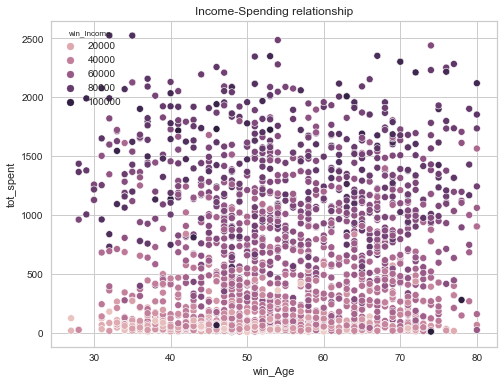

In [56]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df2, x = 'win_Age', y = 'tot_spent', hue='win_Income')
plt.title('Income-Spending relationship');

* There is no relationship between age and number of purchases.
* However, when added number of children the correlation becomes clearer that older people spent more who had more kids. Some younger people with no kid also spent higher but they are characterized by much higher income.

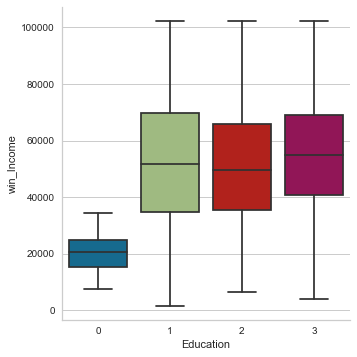

In [57]:
sns.catplot(x="Education", y="win_Income", data=df2, kind='box')

* The median income of all customers are in the similar range (50000-55000) but the group 3 with highest degrees have slightly higher median than the groups 1 and 2. 
* However, customers with Basic Education has it considerably lower (20000)

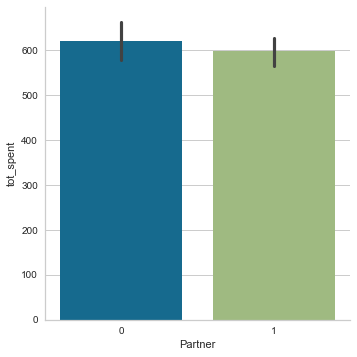

In [58]:
sns.catplot(x="Partner", y="tot_spent", data=df2, kind='bar')

* There is no significant difference between single and partnered customers in terms of how much total they have spent, but the single customers spend more amount than the partnered ones.

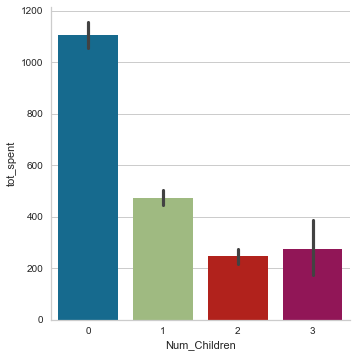

In [59]:
sns.catplot(x="Num_Children", y="tot_spent", data=df2, kind='bar')

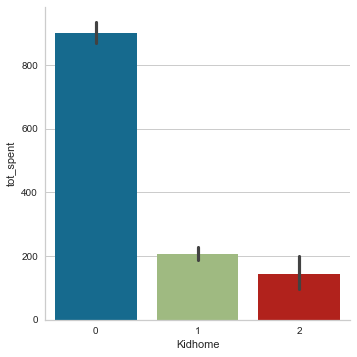

In [60]:
sns.catplot(x="Kidhome", y="tot_spent", data=df2, kind='bar')

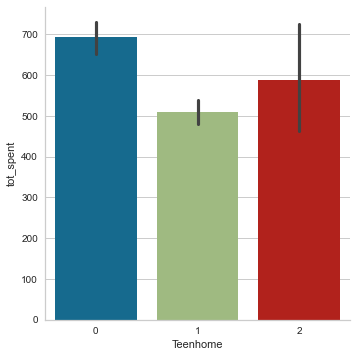

In [61]:
sns.catplot(x="Teenhome", y="tot_spent", data=df2, kind='bar')

* Customers with Teenhome have more spending than customers with Kidhome

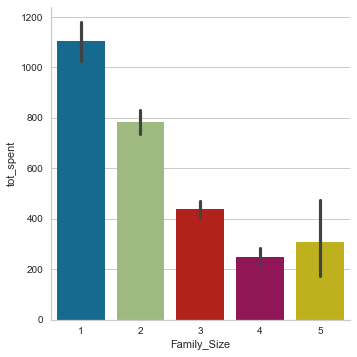

In [62]:
sns.catplot(x="Family_Size", y="tot_spent", data=df2, kind='bar')

* Higher the number of family size, the lower the spending amount. 
* Large amounts of spendings are with those who are single or coupled, but as the families have 1-2 kids their spending was less. 
* With 5 and higher family members again a little spike in spending amount is observed most possibly for bigger ticket items like computer or phone etc. 

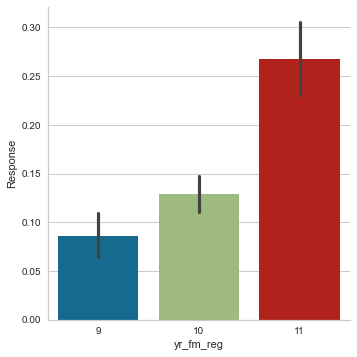

In [63]:
sns.catplot(x="yr_fm_reg", y="Response", data=df2, kind='bar')

<AxesSubplot:xlabel='Response', ylabel='count'>

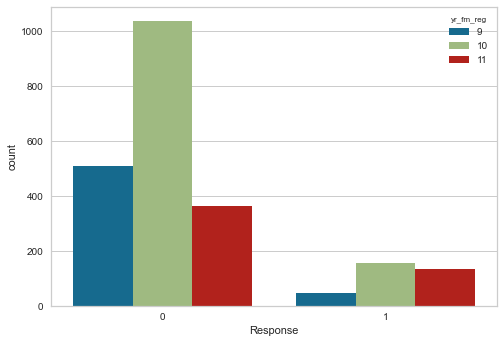

In [64]:
sns.countplot(x=df2["Response"], hue=df2["yr_fm_reg"])

* Since the responses are 0 and 1, 1 being positive response, the bar chart makes an average of all the responses. 
* Therefore, customers with longer registration history responded positively more often (more 1s than 0s) to the last campaign
* this becomes clearer with the count plot that 10 and 11 yrs had much more positive response. 
* The 11 yr group had much fewer total population but their positive response is proportionally much higher. 

## Summary of EDA

* The key factor that correlates the most with the customer spending and number of purchases is their income.  Both number of purchases and total spent amount are higher for customers with higher income.

* There is no correlation of income with age but some correlation observed with education.

* Education matters for income. The median income of all customers are in the similar range (50000-55000) with median of the most educated customers capping the higher end. Customers with Basic Education has it considerably lower (20000).

* Large amounts of spendings are with those who are single or coupled, but as the families have 1-2 kids their spending amount was less. With 5 and higher family members again a little spike in spending amount is observed.

* Customers with longer registration history responded positively more often (more 1s than 0s) to the last campaign.


## Data Scaling

Clustering algorithms are sensititve to the scale of the data. Data scaling is necessary to avoid the algorithm from attracting features with large values. Normalization is used as a result, all features are in the range from 0 to 1.

In [65]:
#Scaling
scaler=StandardScaler()
scaler.fit(df2)
df2_std = pd.DataFrame(scaler.transform(df2),columns= df2.columns )
print("All features are now scaled")

All features are now scaled


## Dimensionality Reduction

* Dimensionality reduction is tested here because there are a lot of features in this dataset, and I wanted to reduce their number, leaving as much information intact as possible.

* In addition, there are many features in the dataset, and to visualize the data (for example, in 3D space) it will help to have fewer features the represents the important features. 

* Also will help to solve the problem of multicollinearity in this large dataset.

* There are several methods for dimensionality reductioin, here we will test PCA, T-SNE and UMAP to check which one works best. 

### 1. Apply PCA to the data.

In [66]:
# PCA to reduce the dimensions of the data to 3 dimensions
pca = PCA(n_components = 3)
pca.fit(df2_std)
PCA_df2 = pd.DataFrame(pca.transform(df2_std), columns = (["PC1", "PC2", "PC3"]))
PCA_df2.describe().T

count          mean       std       min       25%       50%       75%  \
PC1  2240.0  1.475011e-16  3.047195 -5.953633 -2.695900 -0.854034  2.390306   
PC2  2240.0 -4.976178e-17  1.690613 -4.511779 -1.348555 -0.160286  1.217230   
PC3  2240.0 -5.769195e-17  1.617112 -3.602219 -0.858811 -0.218893  0.425919   

          max  
PC1  9.274396  
PC2  6.144035  
PC3  9.067793

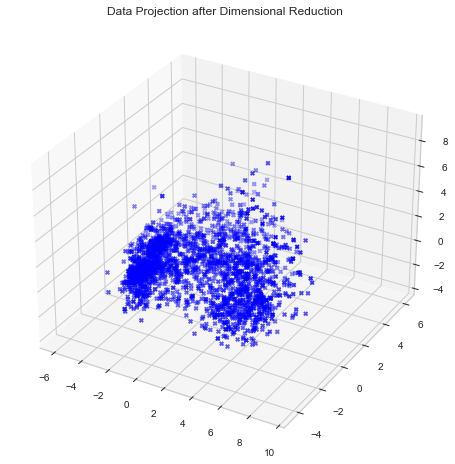

In [67]:
# 3 Axis labels

x =PCA_df2["PC1"]
y =PCA_df2["PC2"]
z =PCA_df2["PC3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="X")
ax.set_title("Data Projection after Dimensional Reduction")
plt.show()

### 2. Apply T-SNE to the data.

In [68]:
# TSNE
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=100, n_iter=300)
tsne_results = tsne.fit_transform(df2_std)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 2240 samples in 0.000s...
[t-SNE] Computed neighbors for 2240 samples in 0.183s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2240
[t-SNE] Computed conditional probabilities for sample 2000 / 2240
[t-SNE] Computed conditional probabilities for sample 2240 / 2240
[t-SNE] Mean sigma: 1.813531
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.502930
[t-SNE] KL divergence after 300 iterations: 1.694477
t-SNE done! Time elapsed: 3.983677387237549 seconds


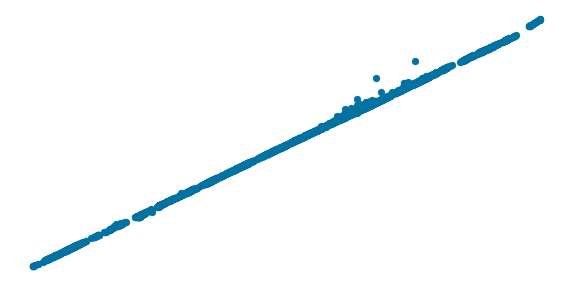

In [69]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### 3. Apply UMAP to the data.

In [70]:
# Umap dimensional reduction
time_start = time.time()
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(df2_std)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 5.9873316287994385 seconds


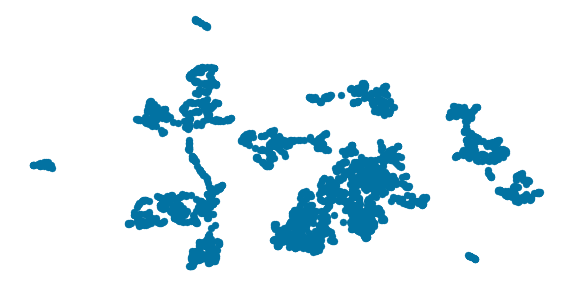

In [71]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### Conclusion from the dimension reduction method study
* T-SNE did not work as satisfactory as the other methods. 
* UMAP worked fine showing some groups.
* PCA was chosen finally, because it  effectively plots and represents the data in a manageable dimension.

# Unsupervised clustering

* We are going to try and group the customers in several groups to be able to make effective marketing strategies.
* Since we do not have any existing customer group, we are going to let machine learning perform unsupervised clustering. 
* Before the final model run, we need to estimate the number of clusters by optimization testing.
* We are going to use the Elbow Method and Silhouette Score visualizer to evaluate and optimize the number of clusters.

### Cluster optimization

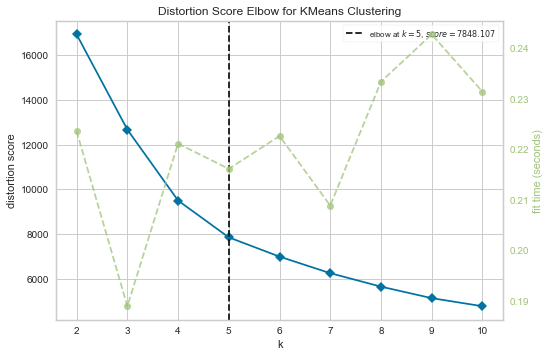

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
# Using the elbow method to find the optimal number of clusters'
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df2)
Elbow_M.show()

* The elbow method provides the optimum cluster number as 5 but from visual inspection both 4 and 5 clusters can work.

For n_clusters = 2, silhouette score is 0.45715854712549525
For n_clusters = 3, silhouette score is 0.39853512180767203
For n_clusters = 4, silhouette score is 0.40528137175842177
For n_clusters = 5, silhouette score is 0.3544998077502334
For n_clusters = 6, silhouette score is 0.3403946052435038
For n_clusters = 7, silhouette score is 0.3577615941335927
For n_clusters = 8, silhouette score is 0.34963087925746855
For n_clusters = 9, silhouette score is 0.35508005189123687


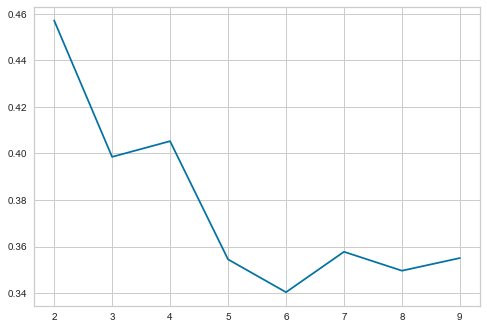

In [73]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((PCA_df2))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(PCA_df2, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

* silhouette score is 0.40, relatively large spike compared to the other clusters.

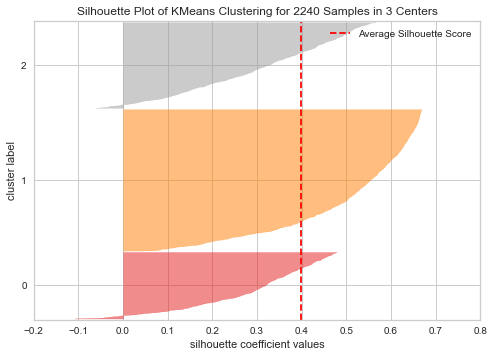

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2240 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [74]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(PCA_df2)
visualizer.show()

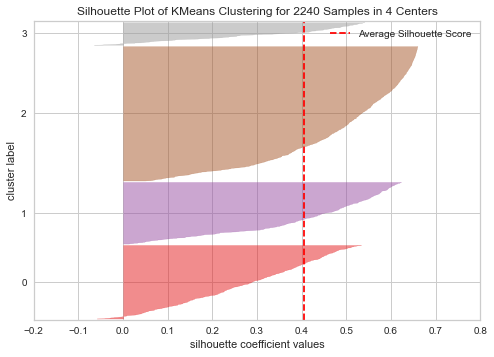

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2240 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [75]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(PCA_df2)
visualizer.show()

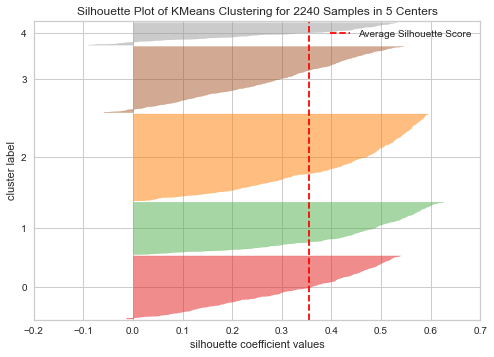

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2240 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [76]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(PCA_df2)
visualizer.show()

In [77]:
# Checking the two datsets

df2_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   float64
 1   Kidhome              2240 non-null   float64
 2   Teenhome             2240 non-null   float64
 3   Recency              2240 non-null   float64
 4   MntWines             2240 non-null   float64
 5   MntFruits            2240 non-null   float64
 6   MntMeatProducts      2240 non-null   float64
 7   MntFishProducts      2240 non-null   float64
 8   MntSweetProducts     2240 non-null   float64
 9   MntGoldProds         2240 non-null   float64
 10  NumDealsPurchases    2240 non-null   float64
 11  NumWebPurchases      2240 non-null   float64
 12  NumCatalogPurchases  2240 non-null   float64
 13  NumStorePurchases    2240 non-null   float64
 14  NumWebVisitsMonth    2240 non-null   float64
 15  AcceptedCmp3         2240 non-null   f

In [78]:
PCA_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     2240 non-null   float64
 1   PC2     2240 non-null   float64
 2   PC3     2240 non-null   float64
dtypes: float64(3)
memory usage: 52.6 KB


### 1. K-Means Model

In [79]:
kmeans4 = KMeans(n_clusters=4, random_state=0)
kmeans4.fit(df2_std)

KMeans(n_clusters=4, random_state=0)

In [80]:
kmeans4_PCA = KMeans(n_clusters=4, random_state=0)
kmeans4_PCA.fit(PCA_df2)

KMeans(n_clusters=4, random_state=0)

In [81]:
# adding kmeans cluster labels to the original dataframe
df_KMclust=df2_std.copy()
df_KMclust["Kmeans4"] = kmeans4.labels_

In [82]:
# adding kmeans cluster labels to the original dataframe

df_KMclust["Kmeans4_PCA"] = kmeans4_PCA.labels_

In [83]:
kmeans5 = KMeans(n_clusters=5, random_state=0)
kmeans5.fit(df2_std)

KMeans(n_clusters=5, random_state=0)

In [84]:
kmeans5_PCA = KMeans(n_clusters=5, random_state=0)
kmeans5_PCA.fit(PCA_df2)

KMeans(n_clusters=5, random_state=0)

In [85]:
# adding kmeans cluster labels to the original dataframe

df_KMclust["Kmeans5"] = kmeans5.labels_

In [86]:
# adding kmeans cluster labels to the original dataframe

df_KMclust["Kmeans5_PCA"] = kmeans5_PCA.labels_

In [87]:
df_KMclust.head()

Education   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  -0.792910 -0.825218 -0.929894  0.307039  0.983781   1.551577   
1  -0.792910  1.032559  0.906934 -0.383664 -0.870479  -0.636301   
2  -0.792910 -0.825218 -0.929894 -0.798086  0.362723   0.570804   
3  -0.792910  1.032559 -0.929894 -0.798086 -0.870479  -0.560857   
4   1.589543  1.032559 -0.929894  1.550305 -0.389085   0.419916   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         1.679702         2.462147          1.476500      0.843207   
1        -0.713225        -0.650449         -0.631503     -0.729006   
2        -0.177032         1.345274         -0.146905     -0.038766   
3        -0.651187        -0.503974         -0.583043     -0.748179   
4        -0.216914         0.155164         -0.001525     -0.556446   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           0.349414         1.409304             2.510890          -0.550785   
1          -0.168236        -1.110409            -0.568720          -1.166125   
2          -0.685887         1.409304            -0.226541           1.295237   
3          -0.168236        -0.750450            -0.910898          -0.550785   
4           1.384715         0.329427             0.115638           0.064556   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0           0.693904      -0.28014      -0.28383      -0.28014     -0.262111   
1          -0.130463      -0.28014      -0.28383      -0.28014     -0.262111   
2          -0.542647      -0.28014      -0.28383      -0.28014     -0.262111   
3           0.281720      -0.28014      -0.28383      -0.28014     -0.262111   
4          -0.130463      -0.28014      -0.28383      -0.28014     -0.262111   

   AcceptedCmp2  Complain  Response  yr_fm_reg   Partner  Num_Children  \
0      -0.11651 -0.097282  2.388846   1.502225 -1.346874     -1.264505   
1      -0.11651 -0.097282 -0.418612  -1.420036 -1.346874      1.396361   
2      -0.11651 -0.097282 -0.418612   0.041094  0.742460     -1.264505   
3      -0.11651 -0.097282 -0.418612  -1.420036  0.742460      0.065928   
4      -0.11651 -0.097282 -0.418612  -1.420036  0.742460      0.065928   

   Family_Size  tot_spent  cmp_accept  tot_purch   win_Age  win_Income  \
0    -1.759115   1.679417    0.621248   1.313544  1.012332    0.305056   
1     0.446548  -0.961275   -0.501912  -1.185022  1.268204   -0.263007   
2    -0.656283   0.282673   -0.501912   1.035926  0.330007    0.954084   
3     0.446548  -0.918094   -0.501912  -0.907403 -1.290517   -1.211769   
4     0.446548  -0.305254   -0.501912   0.203070 -1.034645    0.312521   

   Kmeans4  Kmeans4_PCA  Kmeans5  Kmeans5_PCA  
0        1            0        2            2  
1        0            1        4            0  
2        1            0        2            2  
3        0            1        3            4  
4        2            3        1            1

In [88]:
df_KMclust["Kmeans4"].value_counts()

0    1053
2     583
1     449
3     155
Name: Kmeans4, dtype: int64

In [89]:
df_KMclust["Kmeans4_PCA"].value_counts()

1    1031
3     562
0     473
2     174
Name: Kmeans4_PCA, dtype: int64

In [90]:
df_KMclust["Kmeans5"].value_counts()

3    616
1    544
4    484
2    441
0    155
Name: Kmeans5, dtype: int64

In [91]:
df_KMclust["Kmeans5_PCA"].value_counts()

4    668
1    510
0    485
2    404
3    173
Name: Kmeans5_PCA, dtype: int64

In [92]:
df_KMclust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   float64
 1   Kidhome              2240 non-null   float64
 2   Teenhome             2240 non-null   float64
 3   Recency              2240 non-null   float64
 4   MntWines             2240 non-null   float64
 5   MntFruits            2240 non-null   float64
 6   MntMeatProducts      2240 non-null   float64
 7   MntFishProducts      2240 non-null   float64
 8   MntSweetProducts     2240 non-null   float64
 9   MntGoldProds         2240 non-null   float64
 10  NumDealsPurchases    2240 non-null   float64
 11  NumWebPurchases      2240 non-null   float64
 12  NumCatalogPurchases  2240 non-null   float64
 13  NumStorePurchases    2240 non-null   float64
 14  NumWebVisitsMonth    2240 non-null   float64
 15  AcceptedCmp3         2240 non-null   f

In [93]:
df2clust= df2.copy()

In [94]:
# Adding clustering features to the original dataframe

df2clust["Kmeans4"]=df_KMclust["Kmeans4"]
df2clust["Kmeans4_PCA"]=df_KMclust["Kmeans4_PCA"]
df2clust["Kmeans5"]=df_KMclust["Kmeans5"]
df2clust["Kmeans5_PCA"]=df_KMclust["Kmeans5_PCA"]

In [95]:
df2clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   int64  
 1   Kidhome              2240 non-null   int64  
 2   Teenhome             2240 non-null   int64  
 3   Recency              2240 non-null   int64  
 4   MntWines             2240 non-null   int64  
 5   MntFruits            2240 non-null   int64  
 6   MntMeatProducts      2240 non-null   int64  
 7   MntFishProducts      2240 non-null   int64  
 8   MntSweetProducts     2240 non-null   int64  
 9   MntGoldProds         2240 non-null   int64  
 10  NumDealsPurchases    2240 non-null   int64  
 11  NumWebPurchases      2240 non-null   int64  
 12  NumCatalogPurchases  2240 non-null   int64  
 13  NumStorePurchases    2240 non-null   int64  
 14  NumWebVisitsMonth    2240 non-null   int64  
 15  AcceptedCmp3         2240 non-null   i

In [96]:
object_cols = ['Education', 'Kidhome', 'Teenhome', 'Num_Children', 'Family_Size', 'Partner']
num_cols = ['win_Income', 'Recency', 'MntWines',
            'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases',
            'NumWebVisitsMonth', 'win_Age', 'yr_fm_reg',
            'tot_spent', 'cmp_accept', 'tot_purch']

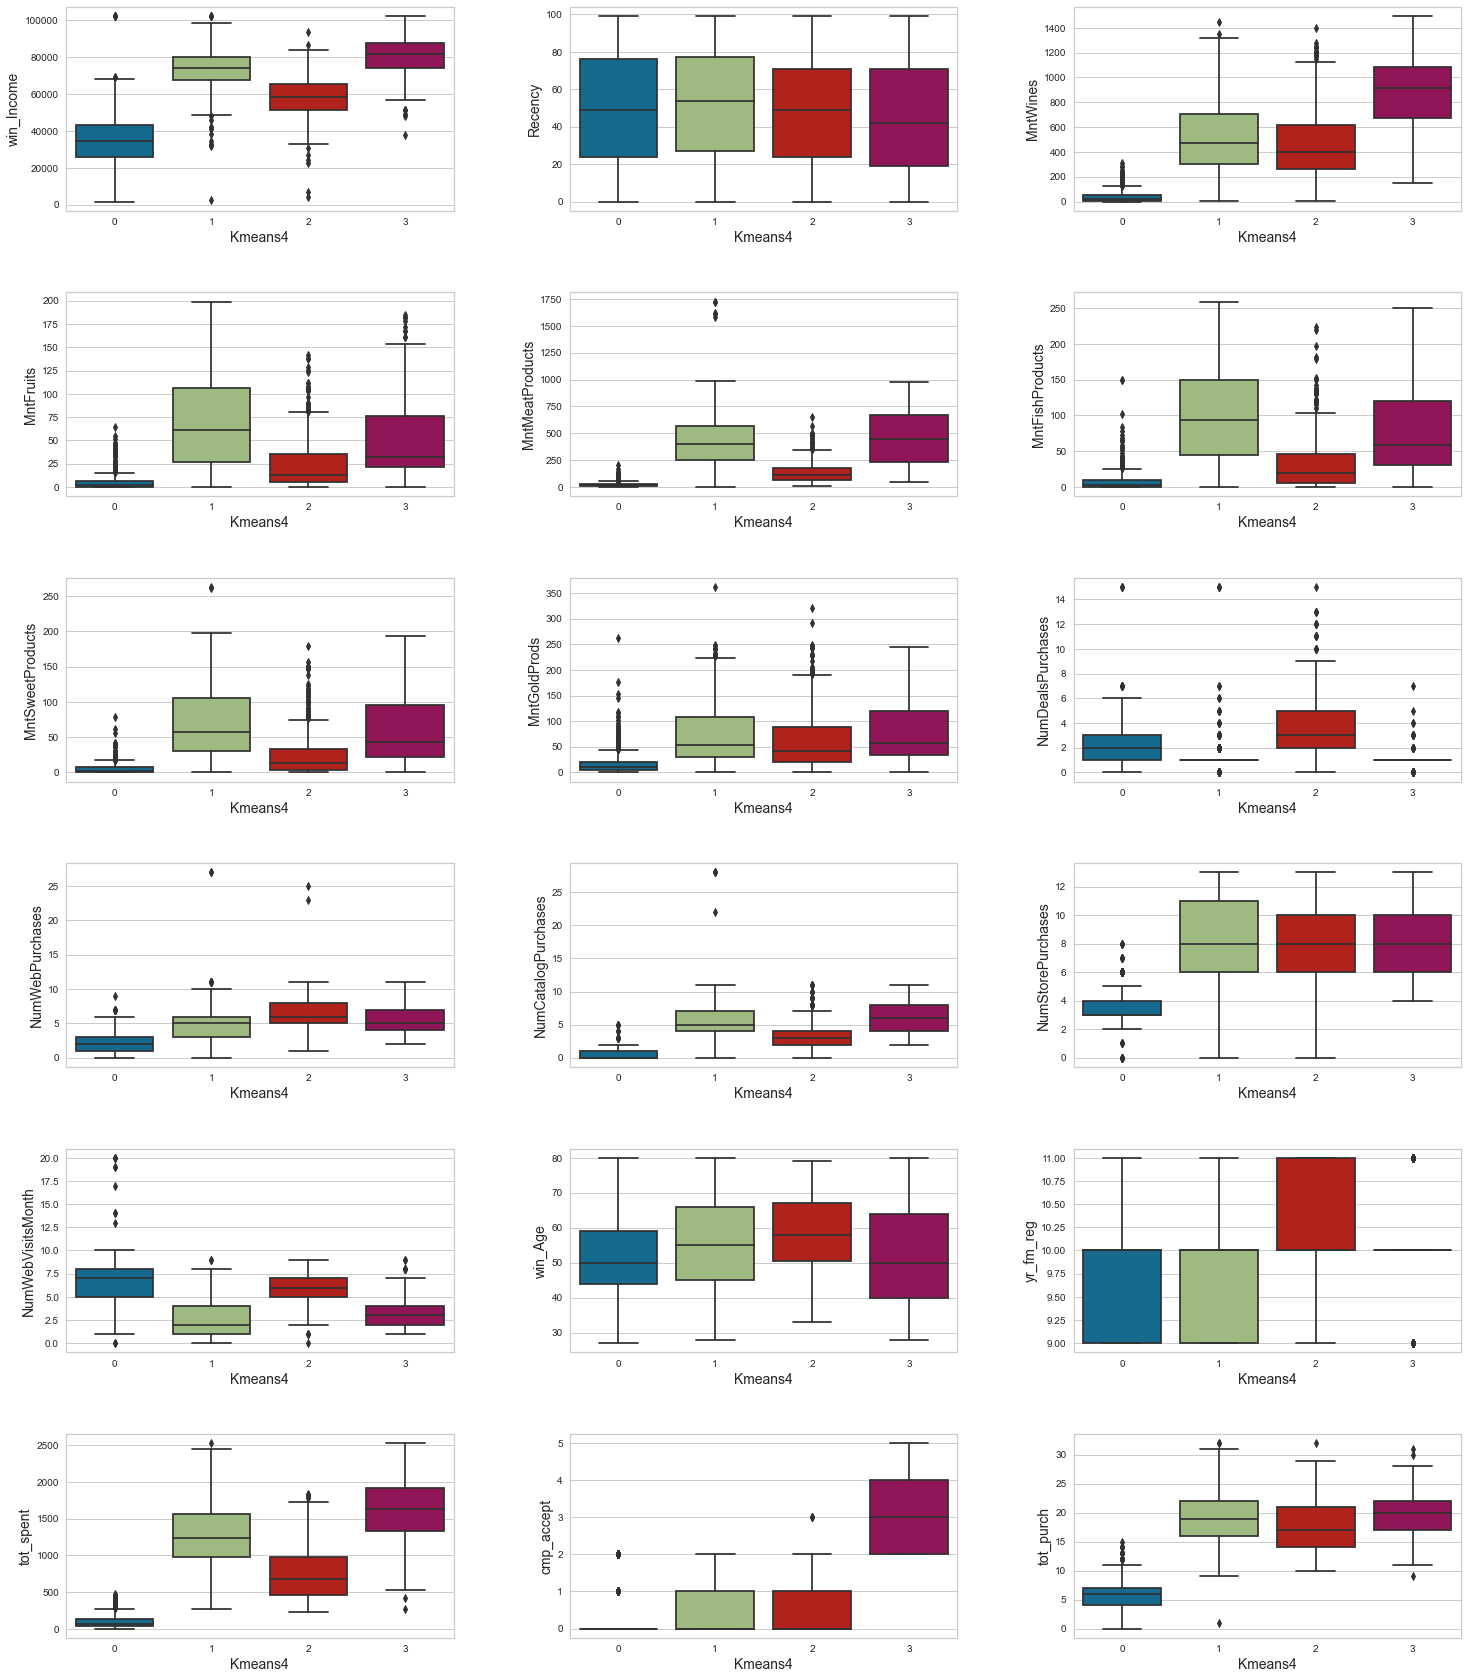

In [97]:
def boxplot():
        n_cols = len(num_cols)
        rows = n_cols // 3 
        _, axes = plt.subplots(ncols=3, nrows=rows, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(num_cols):
            b = sns.boxplot(
                 data=df2clust,
                 y=col,
                 x="Kmeans4",
                 #palette="$",
                 ax=axes.reshape(-1)[num])
            b.set_xlabel('Kmeans4', fontsize=14)
            b.set_ylabel(f'{df2clust[col].name}', fontsize=14)
            sns.set_style('darkgrid')
            
boxplot()

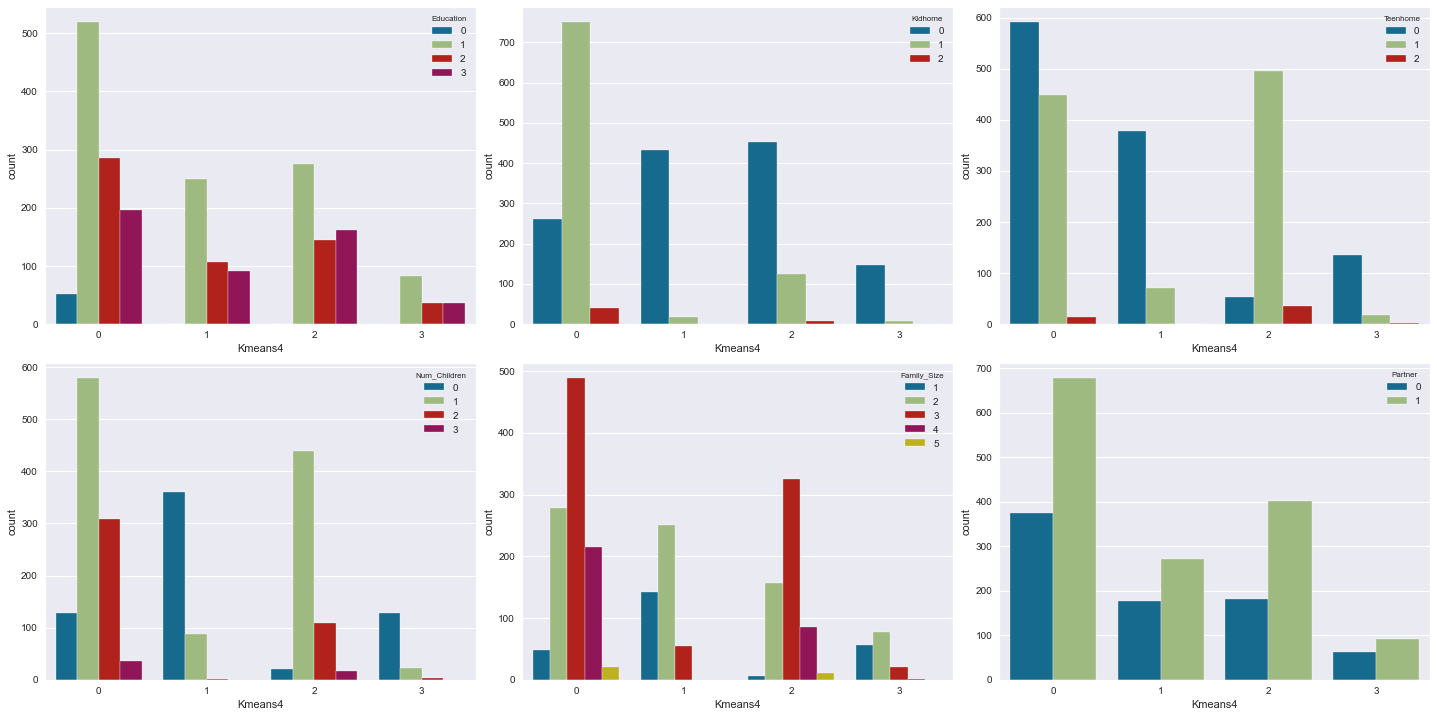

In [98]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax =plt.subplots(2,3)
sns.countplot(df2clust['Kmeans4'], ax=ax[0,0], hue = df2clust["Education"] )
sns.countplot(df2clust['Kmeans4'], ax=ax[0,1], hue = df2clust["Kidhome"] )
sns.countplot(df2clust['Kmeans4'], ax=ax[0,2], hue = df2clust["Teenhome"] )
sns.countplot(df2clust['Kmeans4'], ax=ax[1,0], hue = df2clust["Num_Children"] )
sns.countplot(df2clust['Kmeans4'], ax=ax[1,1], hue = df2clust["Family_Size"] )
sns.countplot(df2clust['Kmeans4'], ax=ax[1,2], hue = df2clust["Partner"] )
fig.show()

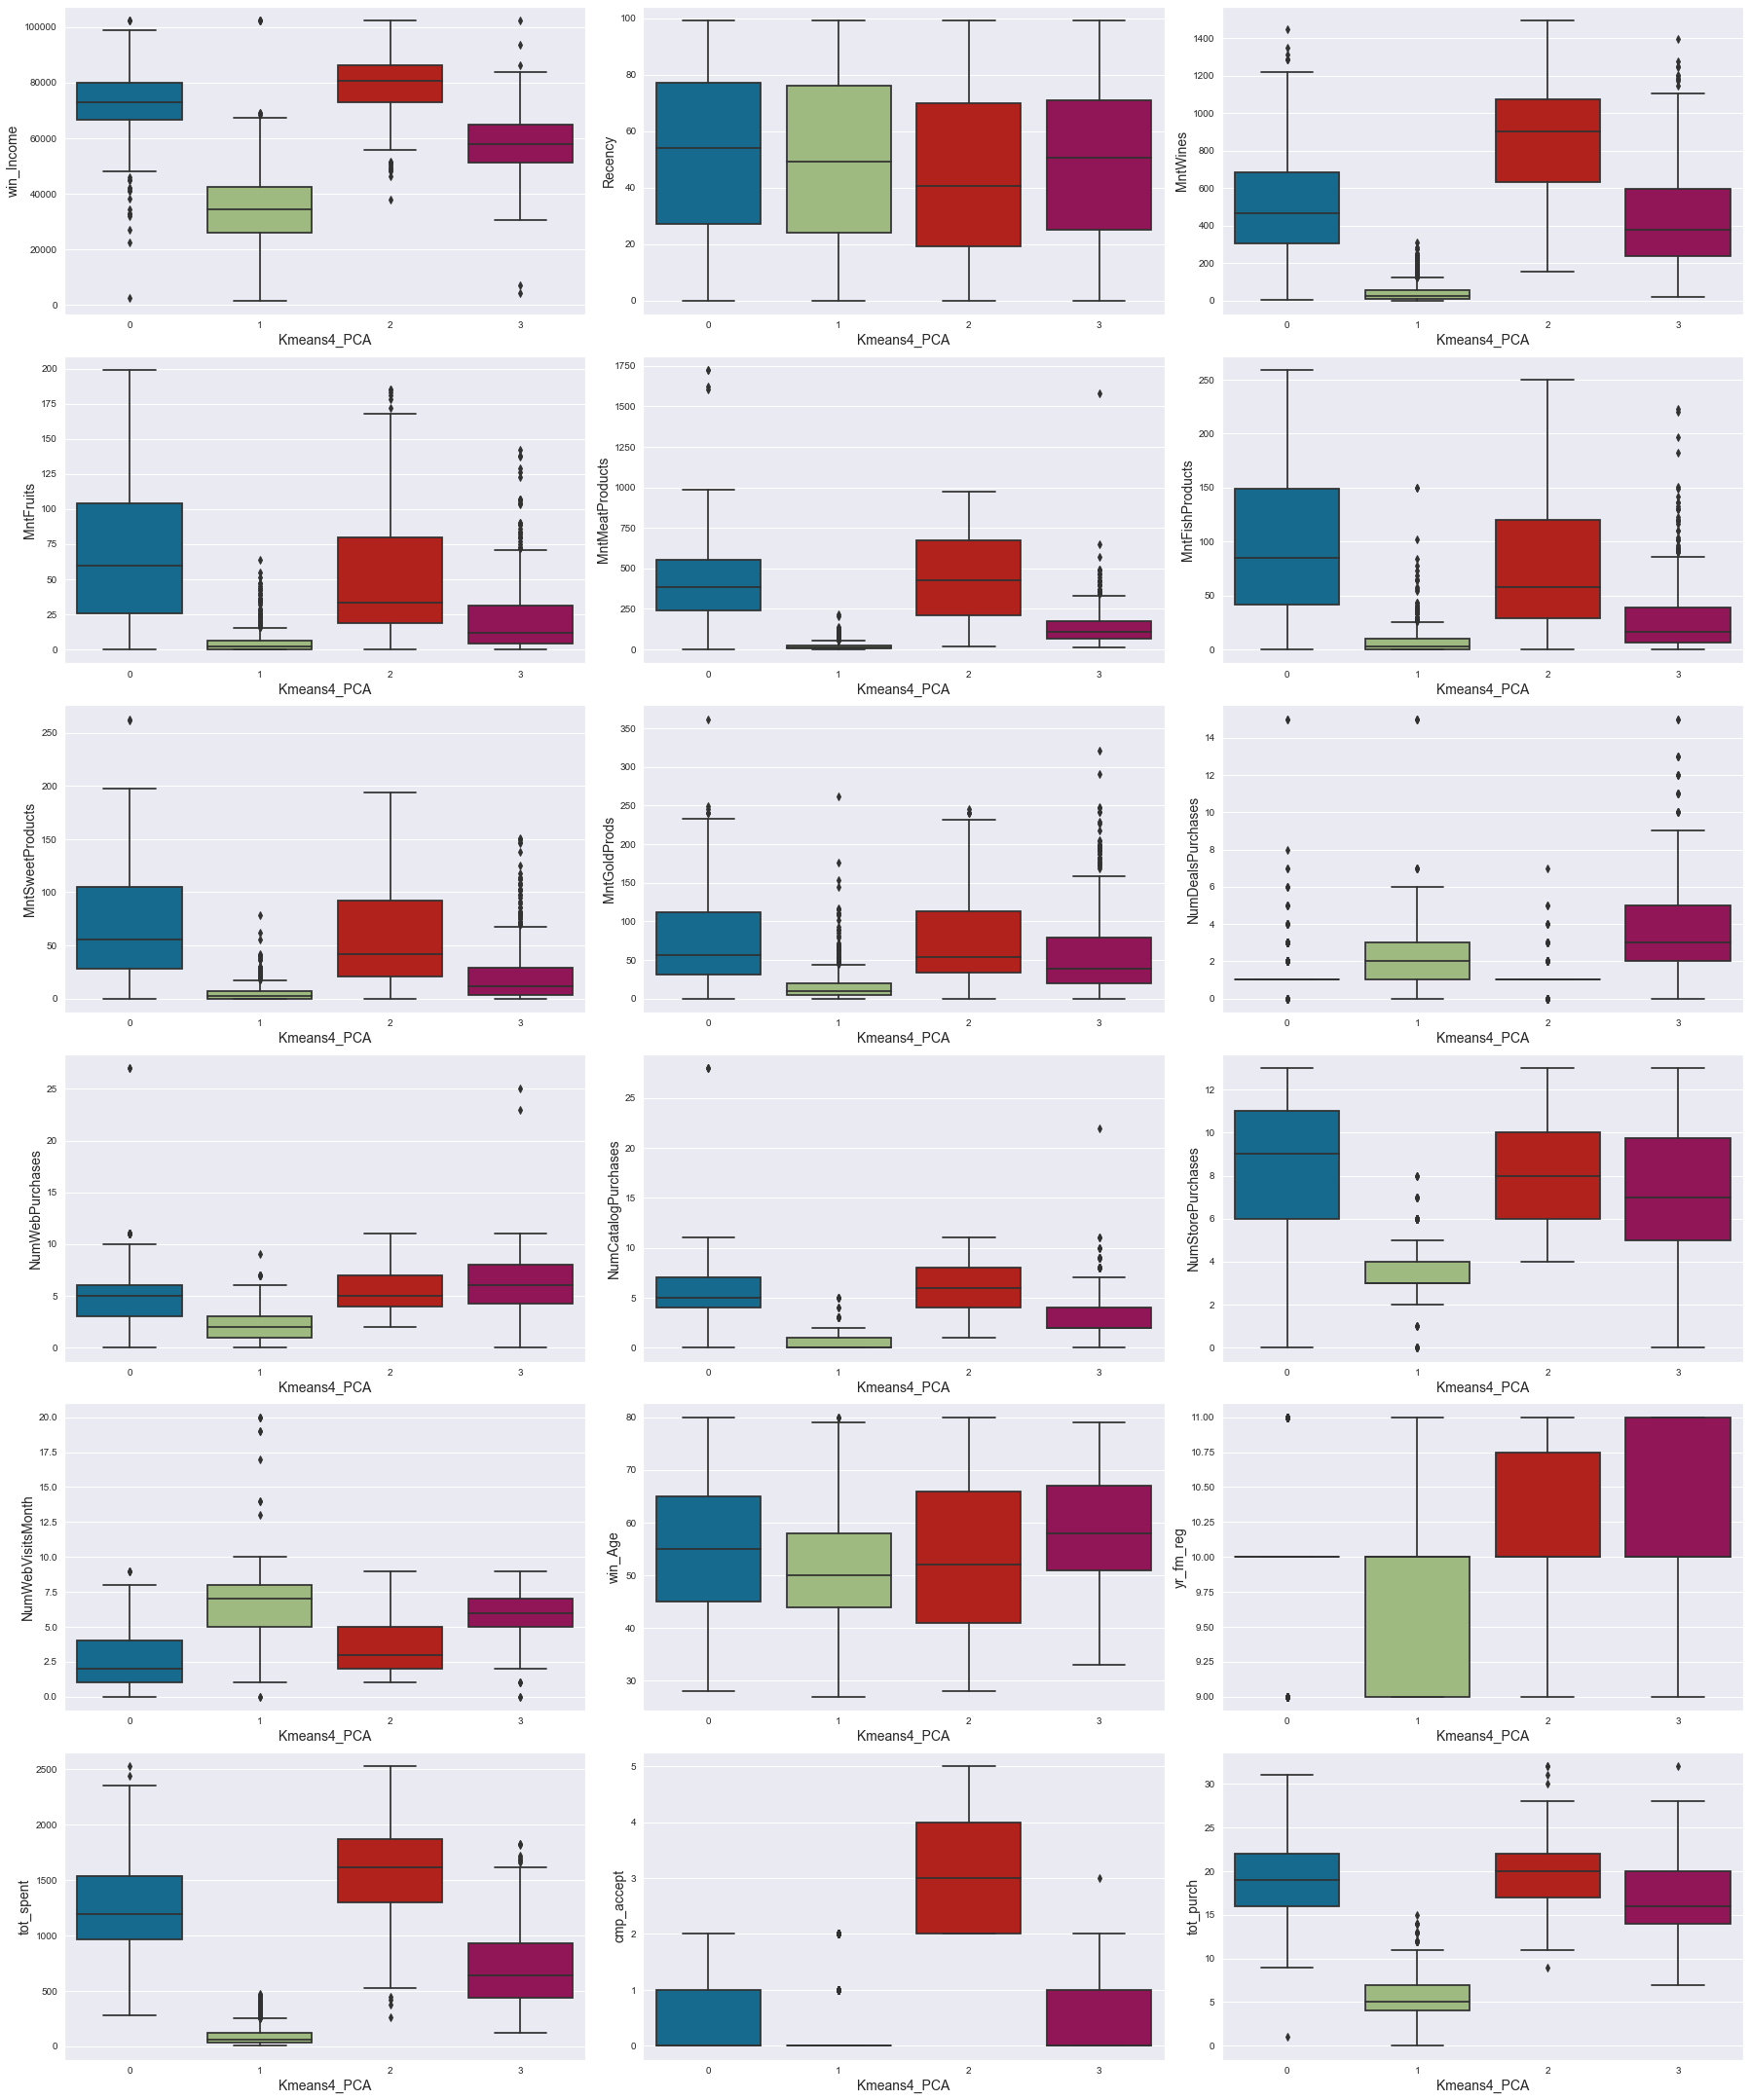

In [99]:
def boxplot():
        n_cols = len(num_cols)
        rows = n_cols // 3 
        _, axes = plt.subplots(ncols=3, nrows=rows, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(num_cols):
            b = sns.boxplot(
                 data=df2clust,
                 y=col,
                 x="Kmeans4_PCA",
                 #palette="Paired",
                 ax=axes.reshape(-1)[num])
            b.set_xlabel('Kmeans4_PCA', fontsize=14)
            b.set_ylabel(f'{df2clust[col].name}', fontsize=14)
            sns.set_style('darkgrid')
            
boxplot()

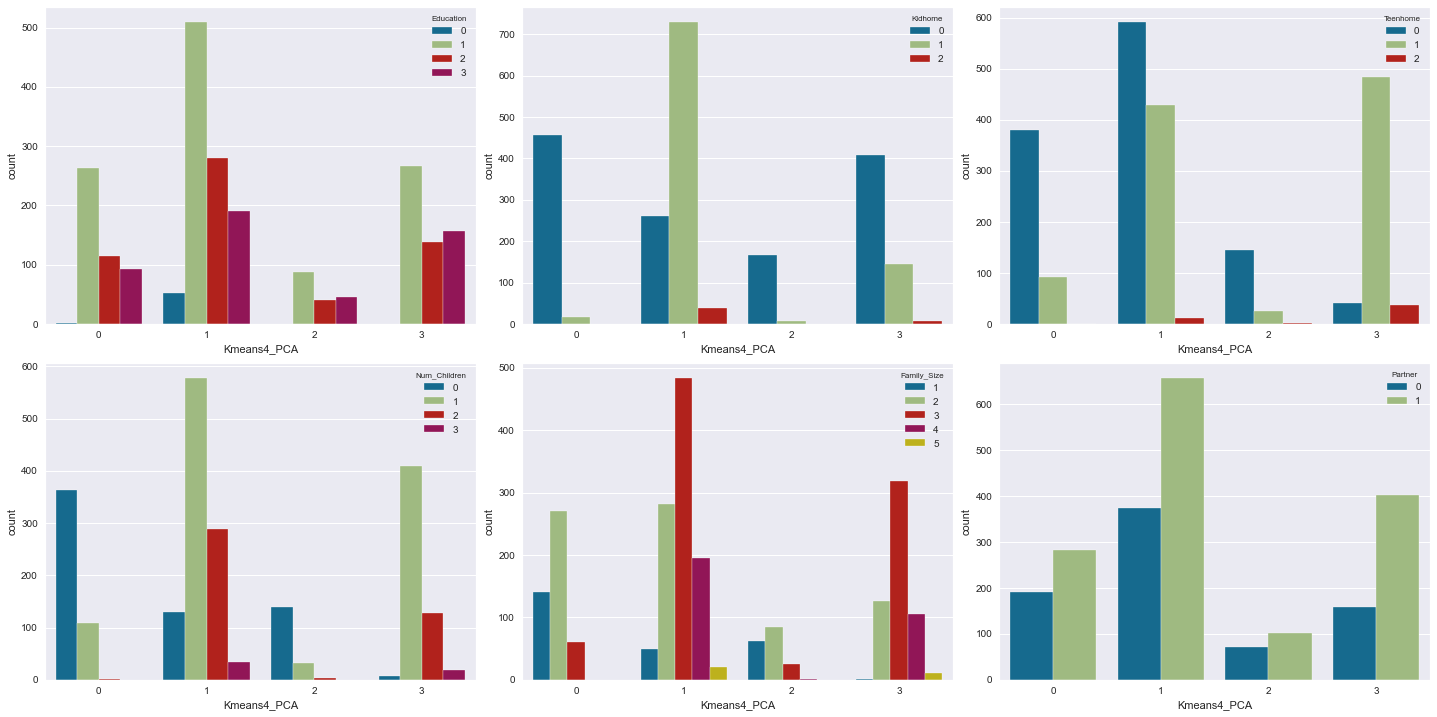

In [100]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax =plt.subplots(2,3)
sns.countplot(df2clust['Kmeans4_PCA'], ax=ax[0,0], hue = df2clust["Education"] )
sns.countplot(df2clust['Kmeans4_PCA'], ax=ax[0,1], hue = df2clust["Kidhome"] )
sns.countplot(df2clust['Kmeans4_PCA'], ax=ax[0,2], hue = df2clust["Teenhome"] )
sns.countplot(df2clust['Kmeans4_PCA'], ax=ax[1,0], hue = df2clust["Num_Children"] )
sns.countplot(df2clust['Kmeans4_PCA'], ax=ax[1,1], hue = df2clust["Family_Size"] )
sns.countplot(df2clust['Kmeans4_PCA'], ax=ax[1,2], hue = df2clust["Partner"] )
fig.show()

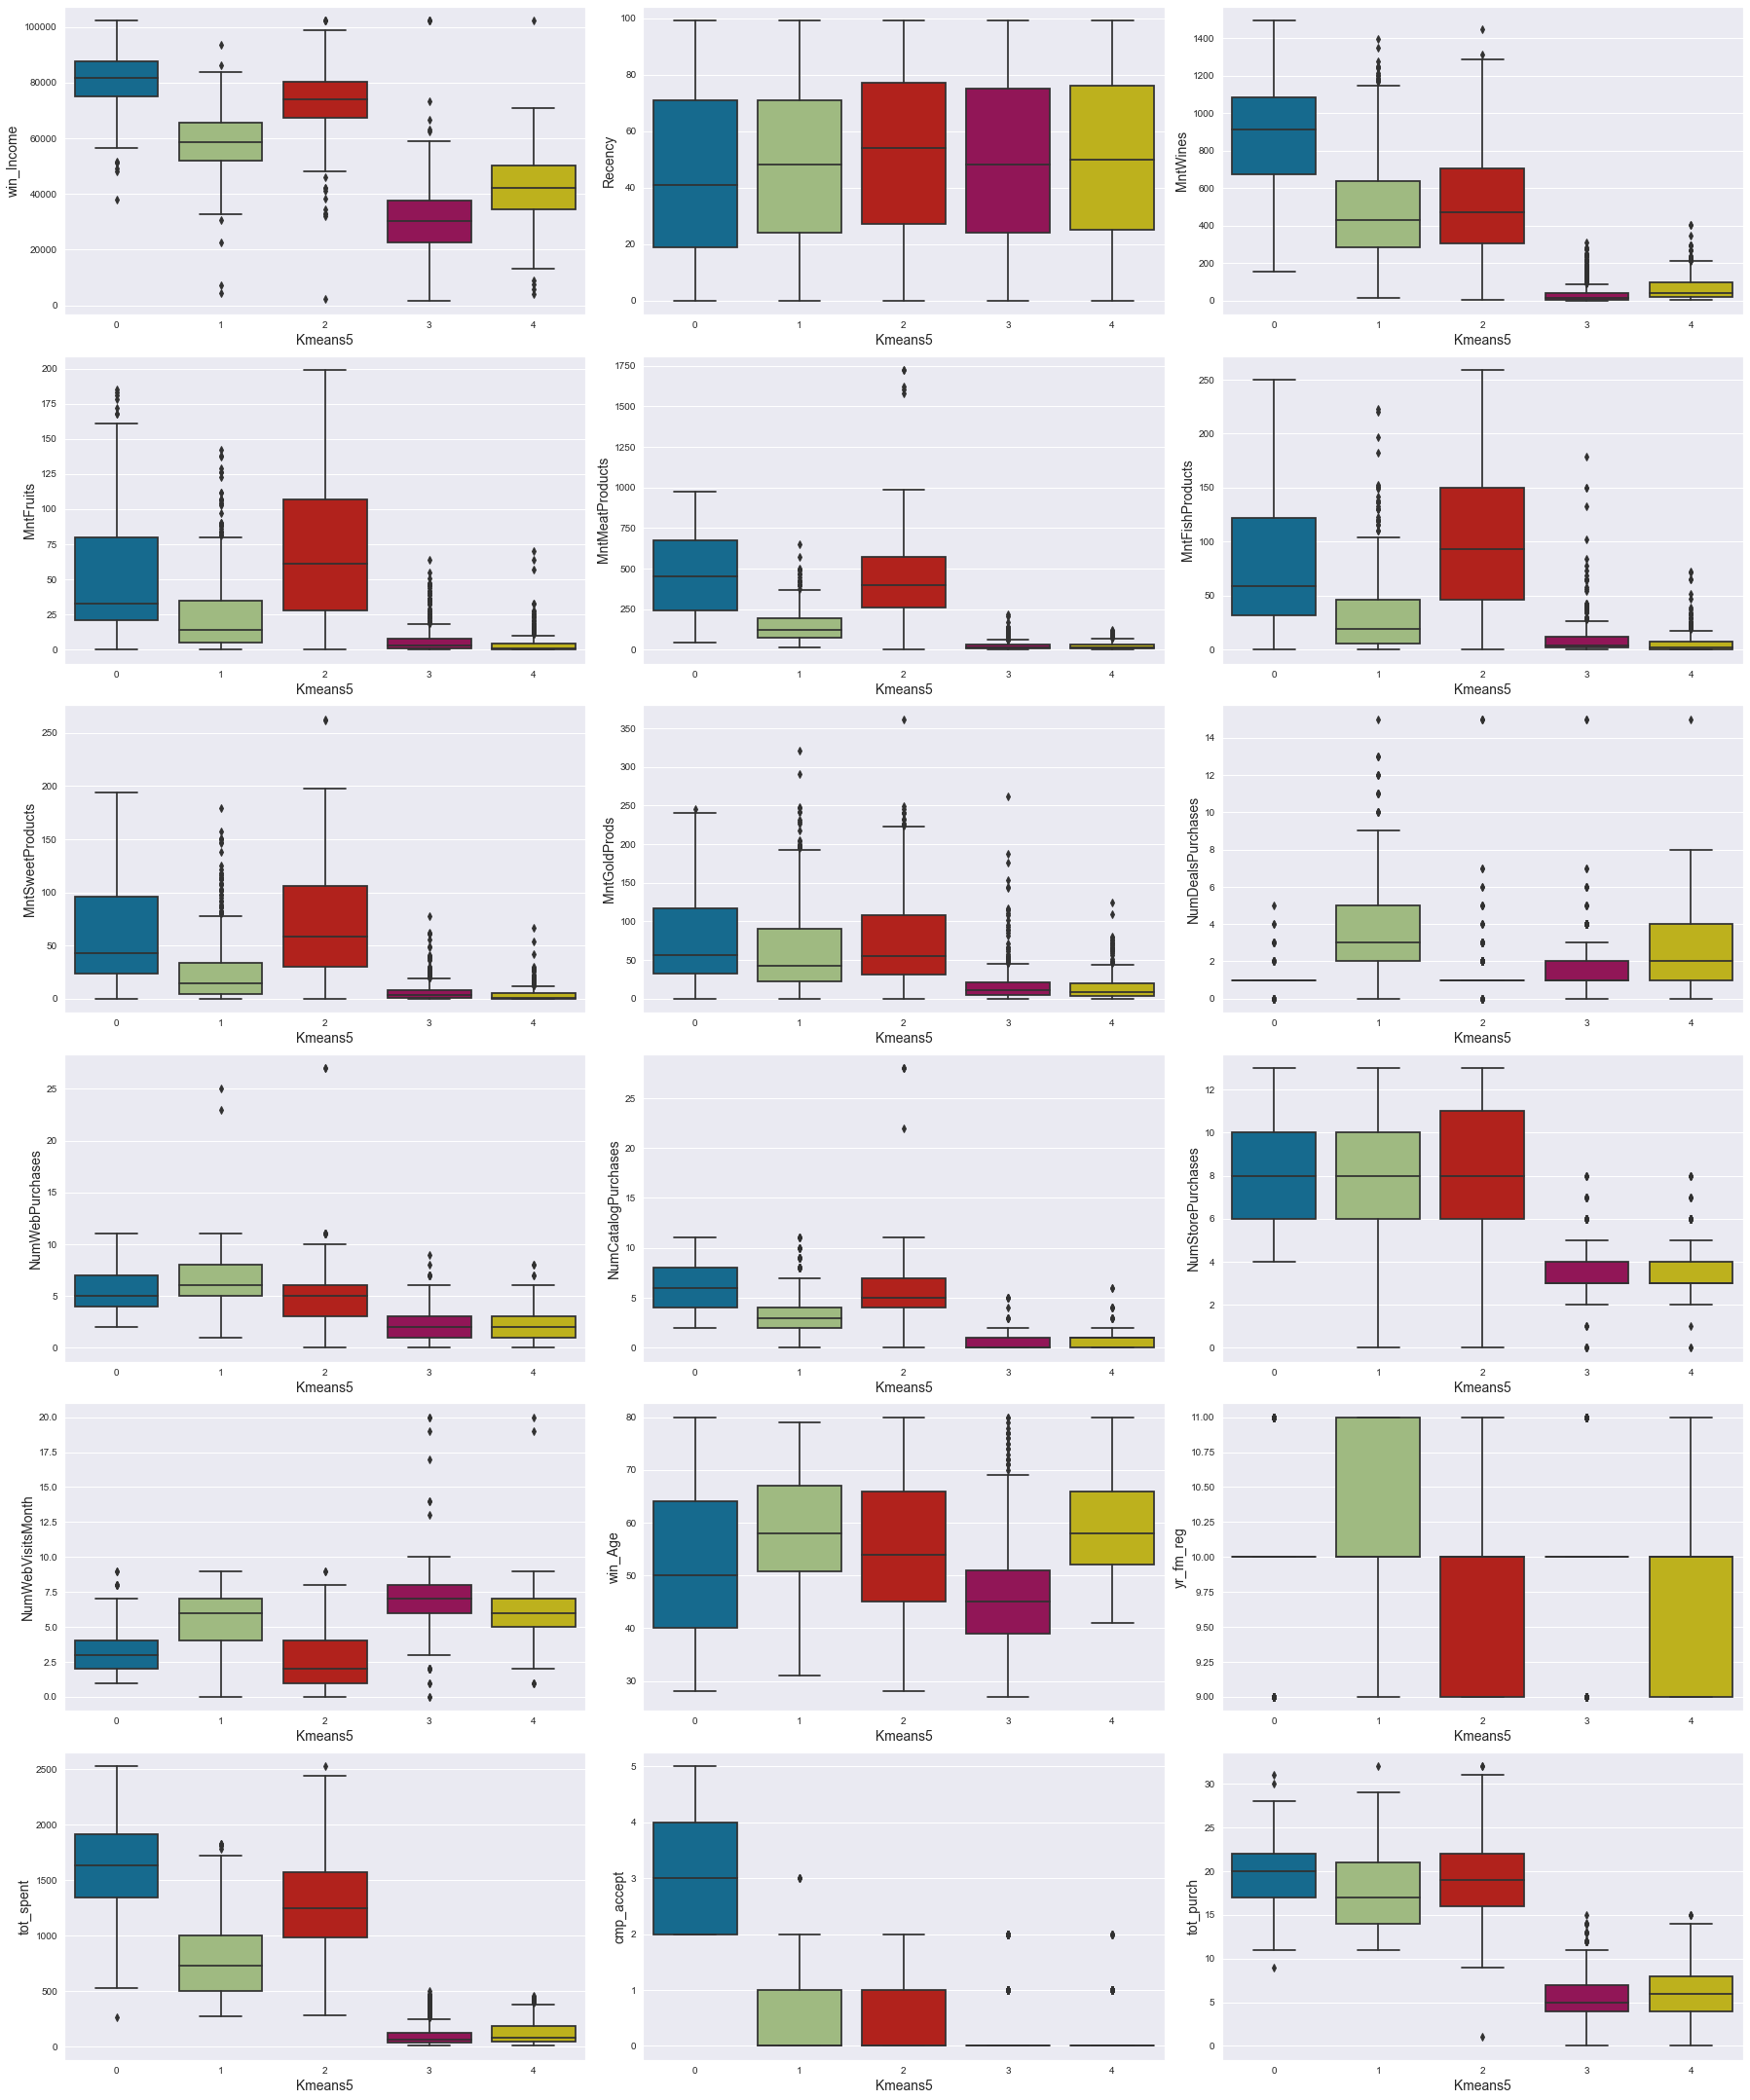

In [101]:
def boxplot():
        n_cols = len(num_cols)
        rows = n_cols // 3 
        _, axes = plt.subplots(ncols=3, nrows=rows, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(num_cols):
            b = sns.boxplot(
                 data=df2clust,
                 y=col,
                 x="Kmeans5",
                 #palette="Paired",
                 ax=axes.reshape(-1)[num])
            b.set_xlabel('Kmeans5', fontsize=14)
            b.set_ylabel(f'{df2clust[col].name}', fontsize=14)
            sns.set_style('darkgrid')
            
boxplot()

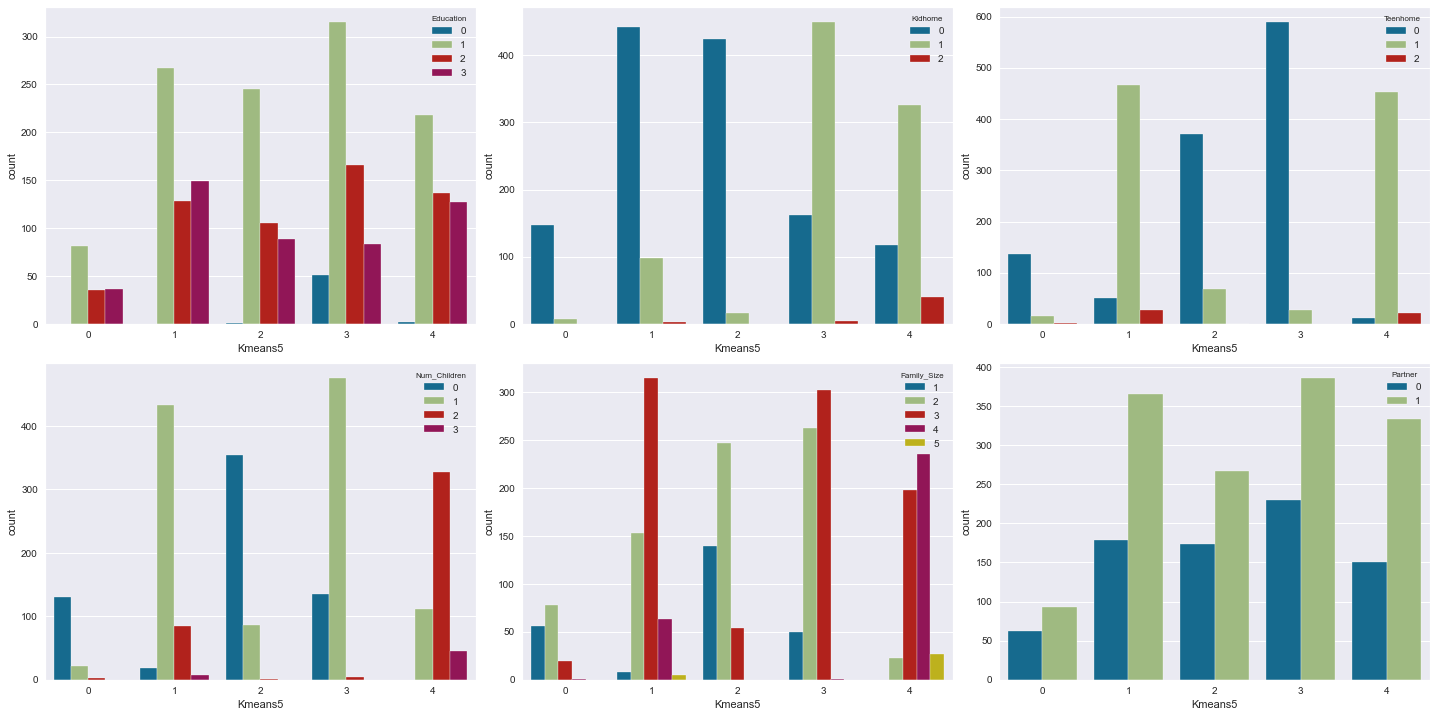

In [102]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax =plt.subplots(2,3)
sns.countplot(df2clust['Kmeans5'], ax=ax[0,0], hue = df2clust["Education"] )
sns.countplot(df2clust['Kmeans5'], ax=ax[0,1], hue = df2clust["Kidhome"] )
sns.countplot(df2clust['Kmeans5'], ax=ax[0,2], hue = df2clust["Teenhome"] )
sns.countplot(df2clust['Kmeans5'], ax=ax[1,0], hue = df2clust["Num_Children"] )
sns.countplot(df2clust['Kmeans5'], ax=ax[1,1], hue = df2clust["Family_Size"] )
sns.countplot(df2clust['Kmeans5'], ax=ax[1,2], hue = df2clust["Partner"] )
fig.show()

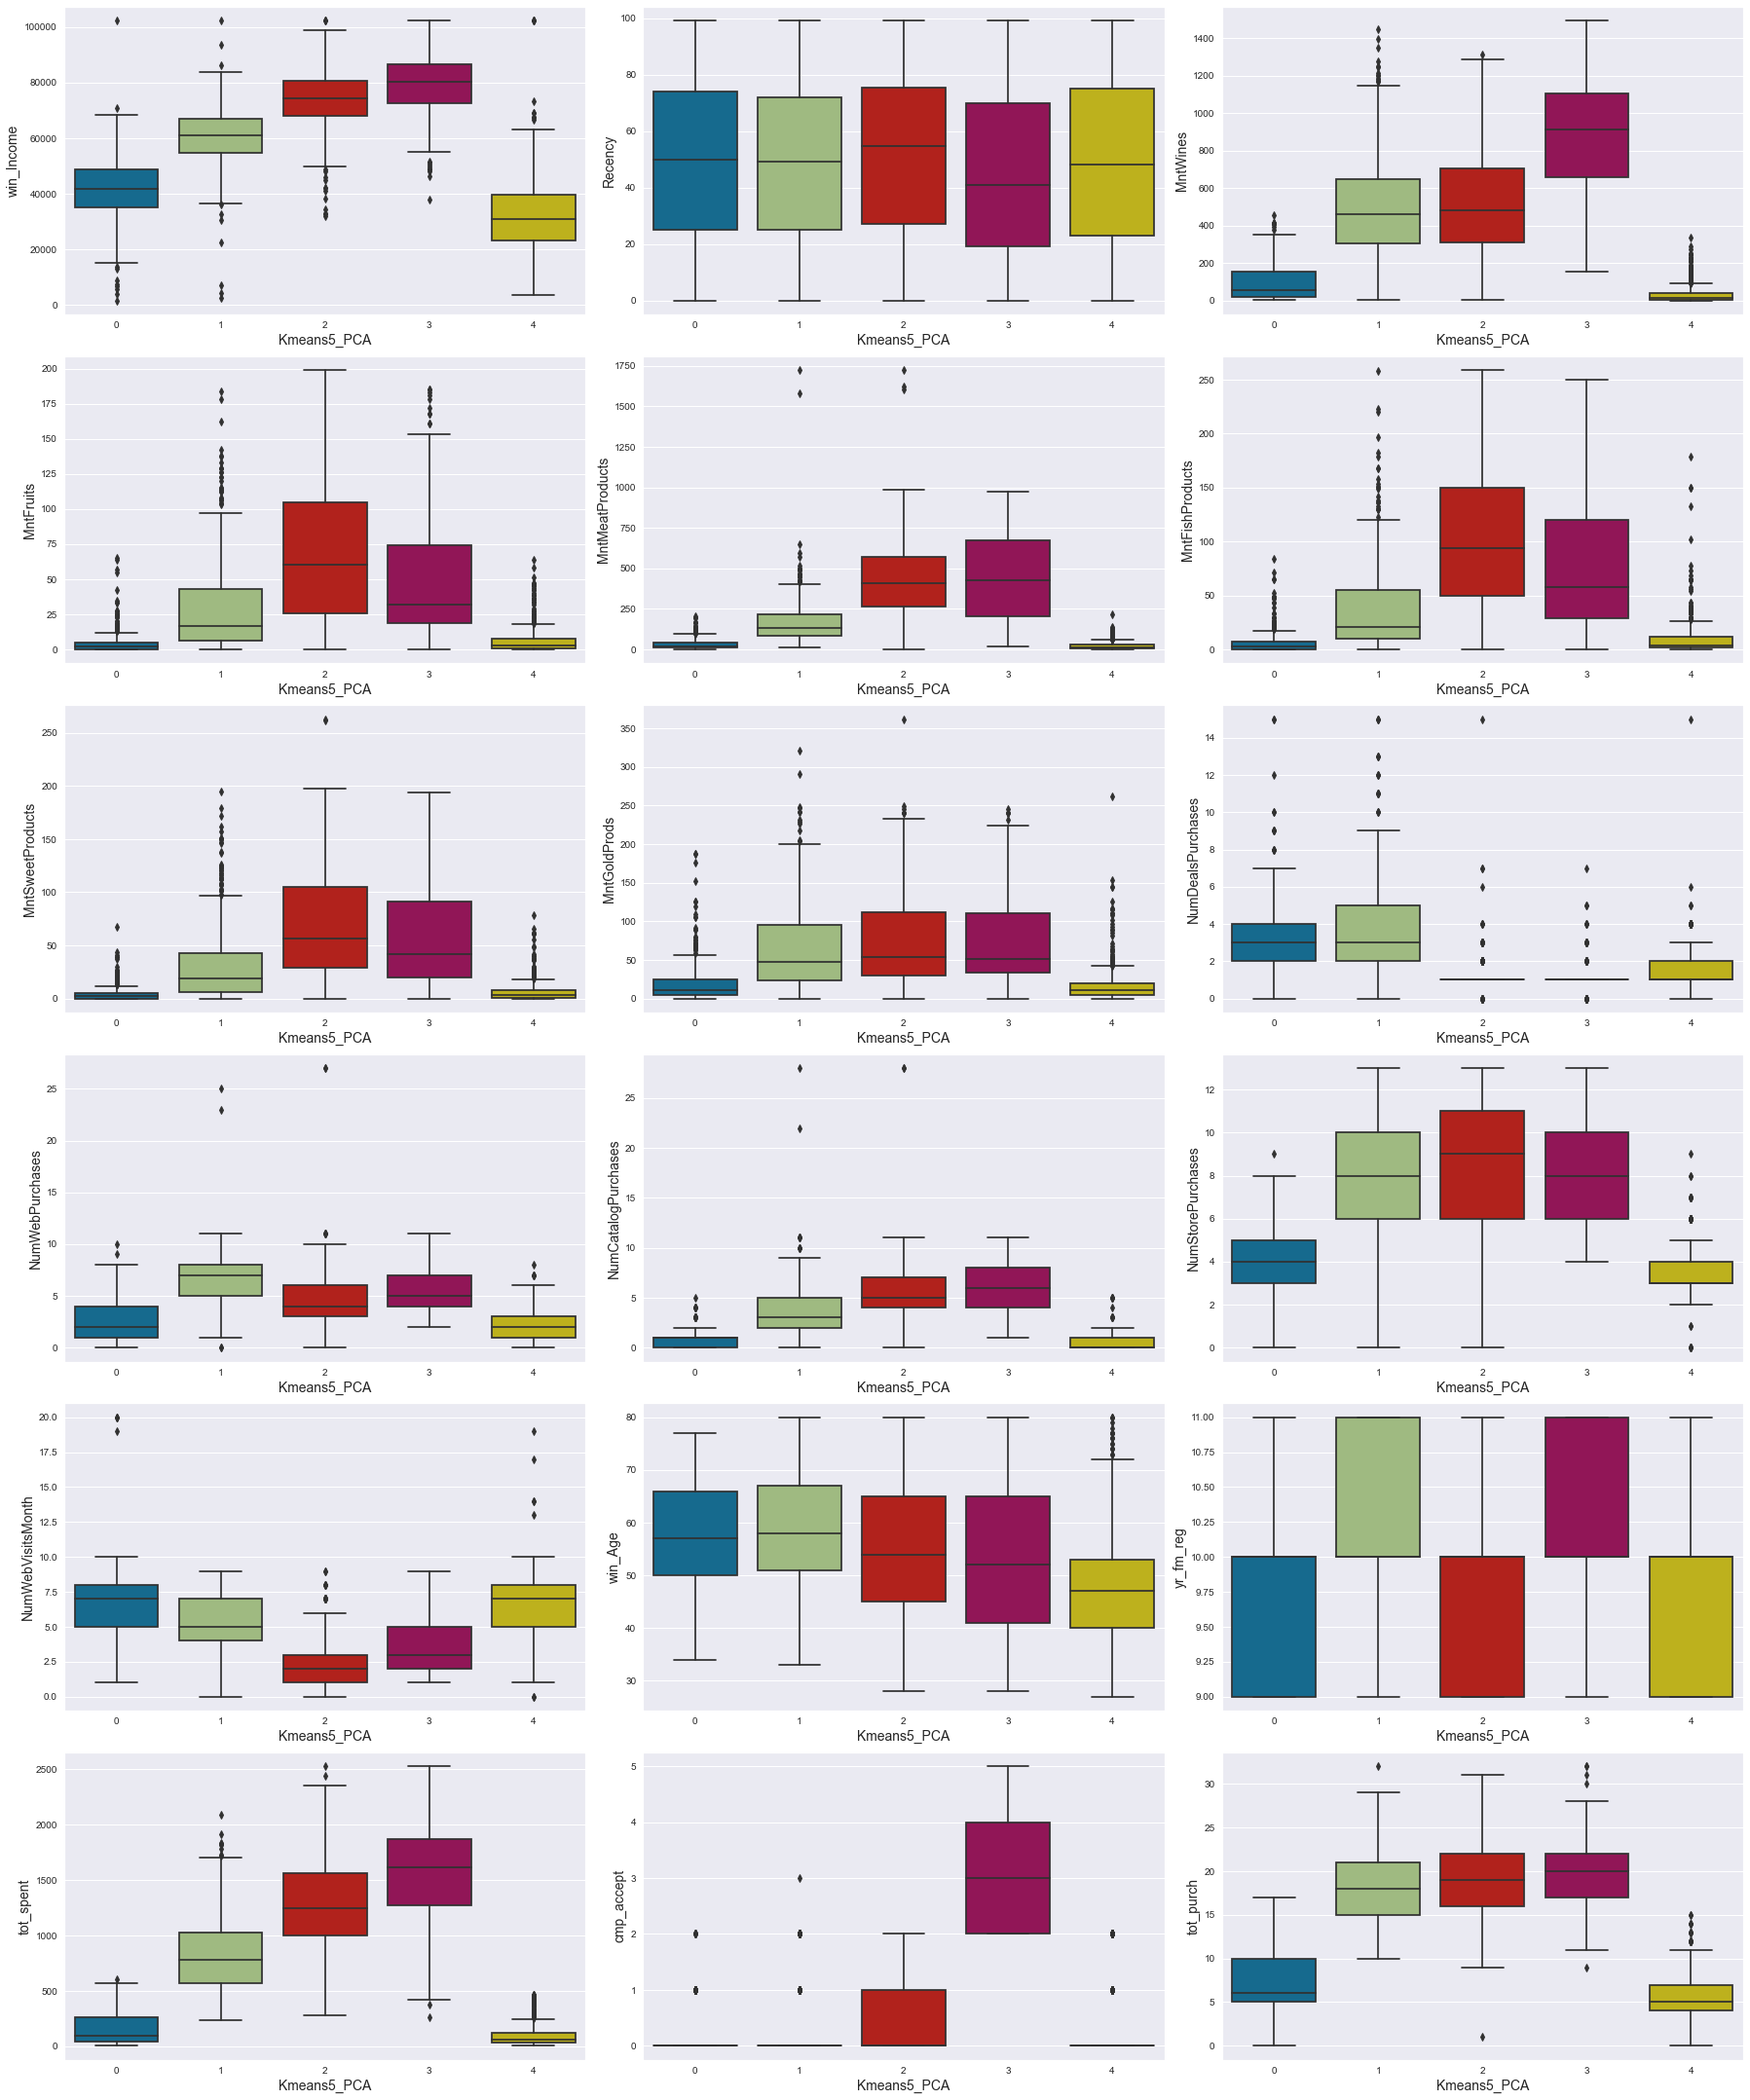

In [103]:
def boxplot():
        n_cols = len(num_cols)
        rows = n_cols // 3 
        _, axes = plt.subplots(ncols=3, nrows=rows, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(num_cols):
            b = sns.boxplot(
                 data=df2clust,
                 y=col,
                 x="Kmeans5_PCA",
                 #palette="Paired",
                 ax=axes.reshape(-1)[num])
            b.set_xlabel('Kmeans5_PCA', fontsize=14)
            b.set_ylabel(f'{df2clust[col].name}', fontsize=14)
            sns.set_style('darkgrid')
            
boxplot()

In [104]:
PCA_df2["Kmeans4"]=df2clust["Kmeans4"]

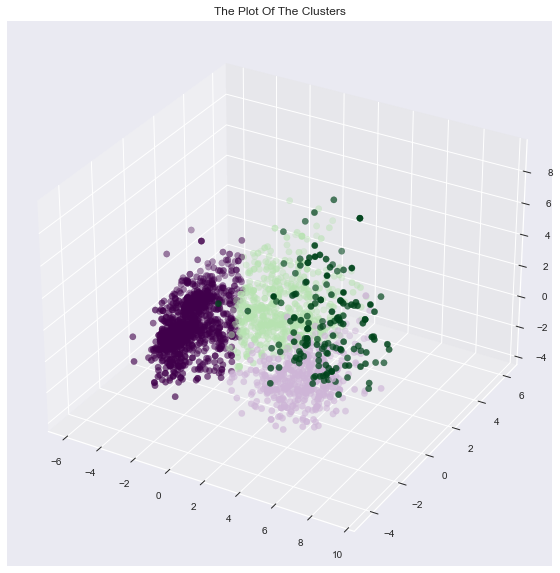

In [105]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df2["Kmeans4"], marker='o', cmap = 'PRGn' )
ax.set_title("The Plot Of The Clusters")
plt.show()

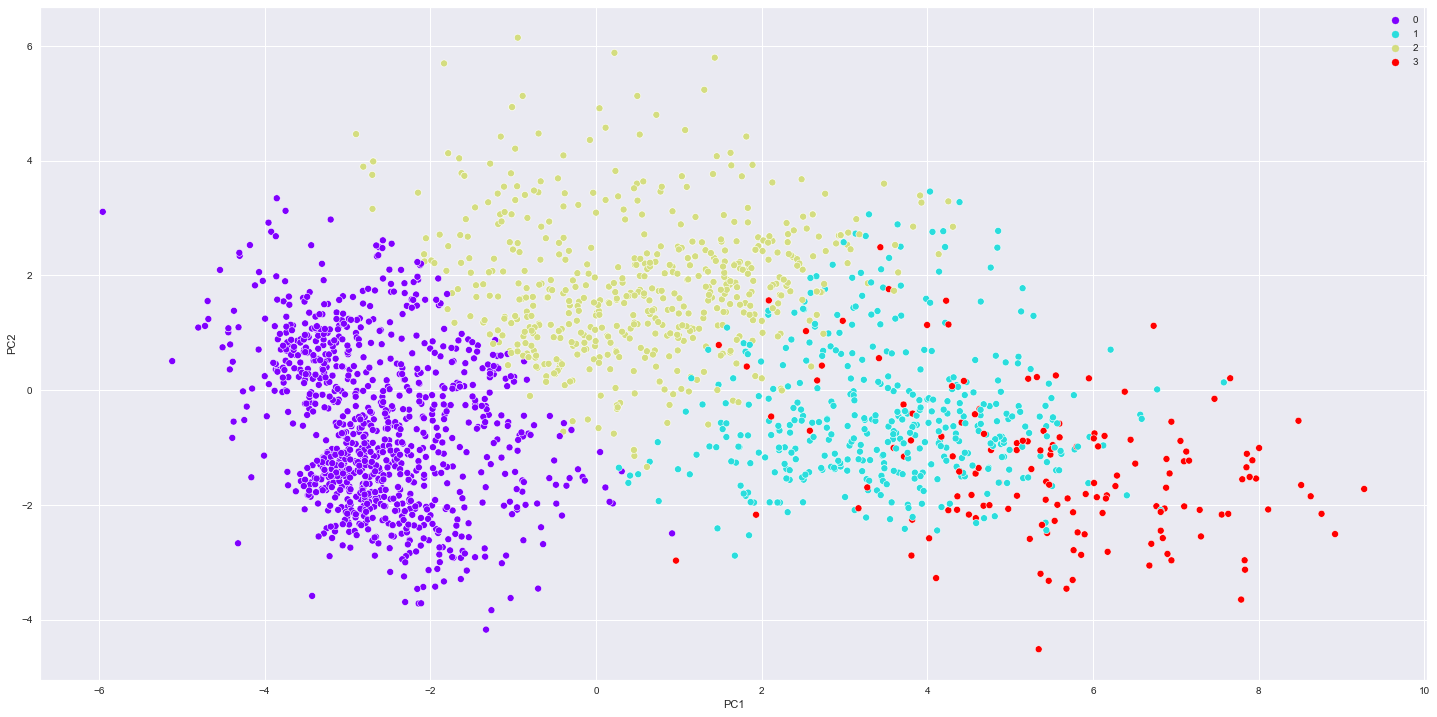

In [106]:
sns.scatterplot(
    data=PCA_df2,
    x="PC1",
    y="PC2",
    hue=df2clust["Kmeans4"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

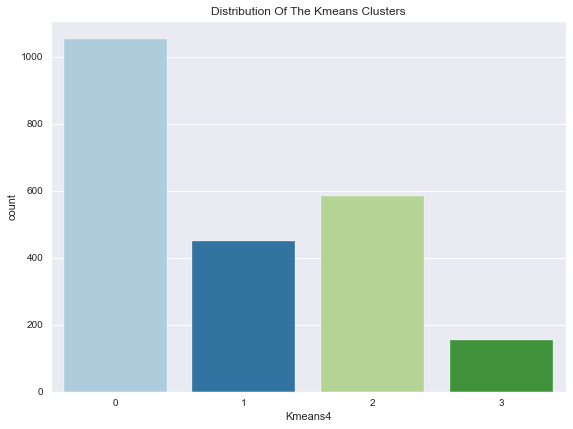

In [107]:
# Countplot of clusters
plt.figure(figsize=(8,6))
pl = sns.countplot(x=df_KMclust["Kmeans4"], palette='Paired' )
pl.set_title("Distribution Of The Kmeans Clusters")
plt.show()

In [108]:
df_KMclust["Kmeans4"].value_counts()

0    1053
2     583
1     449
3     155
Name: Kmeans4, dtype: int64

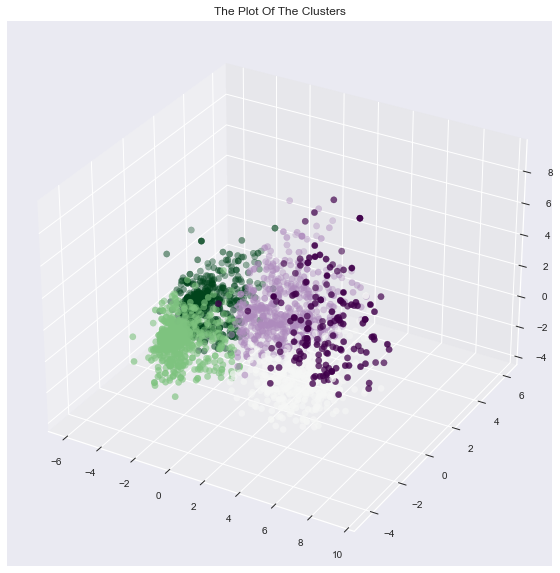

In [109]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_KMclust["Kmeans5"], marker='o', cmap = 'PRGn' )
ax.set_title("The Plot Of The Clusters")
plt.show()

### Heirarchical Clustering

In [111]:
# list of distance metrics
distance_metrics = ["euclidean", "cosine"]

# list of linkage methods
linkage_methods = ["complete", "average"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df2_std, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df2_std))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and complete linkage is 0.6060329284379532.
Cophenetic correlation for Euclidean distance and average linkage is 0.8464916737258036.
Cophenetic correlation for Cosine distance and complete linkage is 0.35829404401240117.
Cophenetic correlation for Cosine distance and average linkage is 0.529418258018264.


In [112]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8464916737258036, which is obtained with Euclidean distance and average linkage.


 **Let's explore different linkage methods with Euclidean distance only.**

In [113]:
# list of linkage methods
linkage_methods = ["ward", "complete", "average"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df2_std, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df2_std))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for ward linkage is 0.56216403725654.
Cophenetic correlation for complete linkage is 0.6060329284379532.
Cophenetic correlation for average linkage is 0.8464916737258036.


In [114]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8464916737258036, which is obtained with average linkage.


**Let's see the dendrograms for the different linkage methods.**

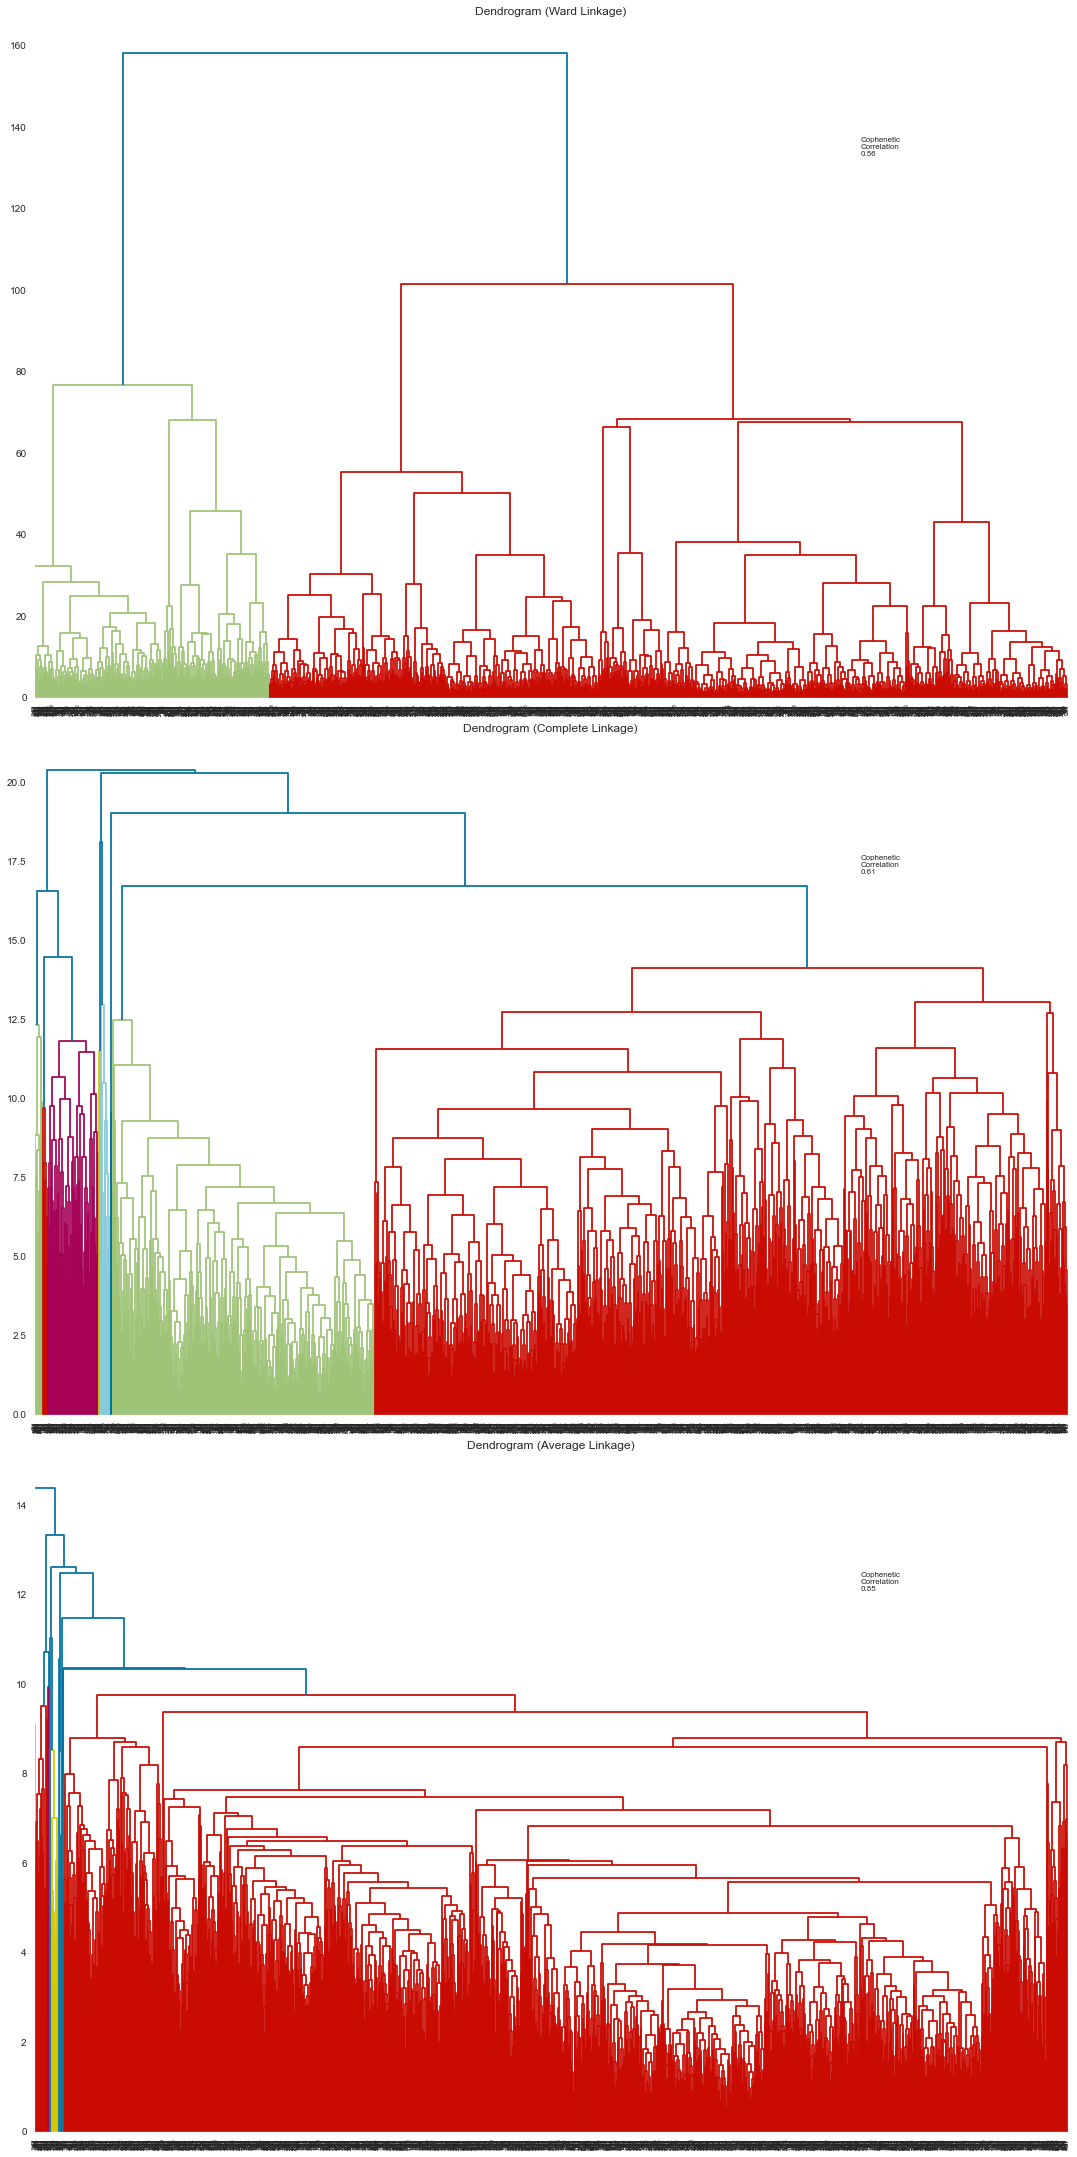

In [115]:
# list of linkage methods
linkage_methods = ["ward", "complete", "average"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df2_std, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df2_std))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",)

In [116]:
ACmodel4 = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
ACmodel4.fit(df2_std)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [117]:
ACmodel4_1 = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
ACmodel4_1.fit(df2_std)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [118]:
ACmodel4_PCA = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
ACmodel4_PCA.fit(PCA_df2)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [119]:
ACmodel5 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
ACmodel5.fit(df2_std)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [120]:
ACmodel5_PCA = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
ACmodel5_PCA.fit(PCA_df2)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [121]:
# adding heirarchical cluster labels to a copy of the original dataframe

df_ACclust=df2_std.copy()
df_ACclust["AC4"] = ACmodel4.labels_
df_ACclust["AC4_1"] = ACmodel4_1.labels_

df_ACclust["AC4_PCA"] = ACmodel4_PCA.labels_
df_ACclust["AC5"] = ACmodel5.labels_
df_ACclust["AC5_PCA"] = ACmodel5_PCA.labels_

df_ACclust.head()

Education   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  -0.792910 -0.825218 -0.929894  0.307039  0.983781   1.551577   
1  -0.792910  1.032559  0.906934 -0.383664 -0.870479  -0.636301   
2  -0.792910 -0.825218 -0.929894 -0.798086  0.362723   0.570804   
3  -0.792910  1.032559 -0.929894 -0.798086 -0.870479  -0.560857   
4   1.589543  1.032559 -0.929894  1.550305 -0.389085   0.419916   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         1.679702         2.462147          1.476500      0.843207   
1        -0.713225        -0.650449         -0.631503     -0.729006   
2        -0.177032         1.345274         -0.146905     -0.038766   
3        -0.651187        -0.503974         -0.583043     -0.748179   
4        -0.216914         0.155164         -0.001525     -0.556446   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           0.349414         1.409304             2.510890          -0.550785   
1          -0.168236        -1.110409            -0.568720          -1.166125   
2          -0.685887         1.409304            -0.226541           1.295237   
3          -0.168236        -0.750450            -0.910898          -0.550785   
4           1.384715         0.329427             0.115638           0.064556   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0           0.693904      -0.28014      -0.28383      -0.28014     -0.262111   
1          -0.130463      -0.28014      -0.28383      -0.28014     -0.262111   
2          -0.542647      -0.28014      -0.28383      -0.28014     -0.262111   
3           0.281720      -0.28014      -0.28383      -0.28014     -0.262111   
4          -0.130463      -0.28014      -0.28383      -0.28014     -0.262111   

   AcceptedCmp2  Complain  Response  yr_fm_reg   Partner  Num_Children  \
0      -0.11651 -0.097282  2.388846   1.502225 -1.346874     -1.264505   
1      -0.11651 -0.097282 -0.418612  -1.420036 -1.346874      1.396361   
2      -0.11651 -0.097282 -0.418612   0.041094  0.742460     -1.264505   
3      -0.11651 -0.097282 -0.418612  -1.420036  0.742460      0.065928   
4      -0.11651 -0.097282 -0.418612  -1.420036  0.742460      0.065928   

   Family_Size  tot_spent  cmp_accept  tot_purch   win_Age  win_Income  AC4  \
0    -1.759115   1.679417    0.621248   1.313544  1.012332    0.305056    0   
1     0.446548  -0.961275   -0.501912  -1.185022  1.268204   -0.263007    0   
2    -0.656283   0.282673   -0.501912   1.035926  0.330007    0.954084    0   
3     0.446548  -0.918094   -0.501912  -0.907403 -1.290517   -1.211769    0   
4     0.446548  -0.305254   -0.501912   0.203070 -1.034645    0.312521    0   

   AC4_1  AC4_PCA  AC5  AC5_PCA  
0      3        1    0        0  
1      0        2    0        2  
2      3        1    0        0  
3      0        2    0        2  
4      0        1    0        0

In [122]:
df_ACclust["AC4"].value_counts()

0    2185
2      30
1      21
3       4
Name: AC4, dtype: int64

In [123]:
df_ACclust["AC4_1"].value_counts()

0    1017
2     712
3     280
1     231
Name: AC4_1, dtype: int64

In [124]:
df_ACclust["AC4_PCA"].value_counts()

2    1050
1    1034
0     138
3      18
Name: AC4_PCA, dtype: int64

In [125]:
df_ACclust["AC5"].value_counts()

0    2181
2      30
1      21
3       4
4       4
Name: AC5, dtype: int64

In [126]:
df_ACclust["AC5_PCA"].value_counts()

2    1050
0    1034
3     119
4      19
1      18
Name: AC5_PCA, dtype: int64

### Summary of Heirarchical clustering

* Tested on Ward linkage, complete linkage and average linkage.
* Average linkage has high score (0.84)
* Selected the Ward linkage due to better distribution of customers across clusters. 

In [127]:
# Adding clustering features to the original dataframe for all clusters from PCA and Hierarchical together

df2clust["AC4"]=df_ACclust["AC4"] (# average)
df2clust["AC4_1"]=df_ACclust["AC4_1"] (# ward)
df2clust["AC4_PCA"]=df_ACclust["AC4_PCA"]

df2clust["AC5"]=df_ACclust["AC5"]
df2clust["AC5_PCA"]=df_ACclust["AC5_PCA"]

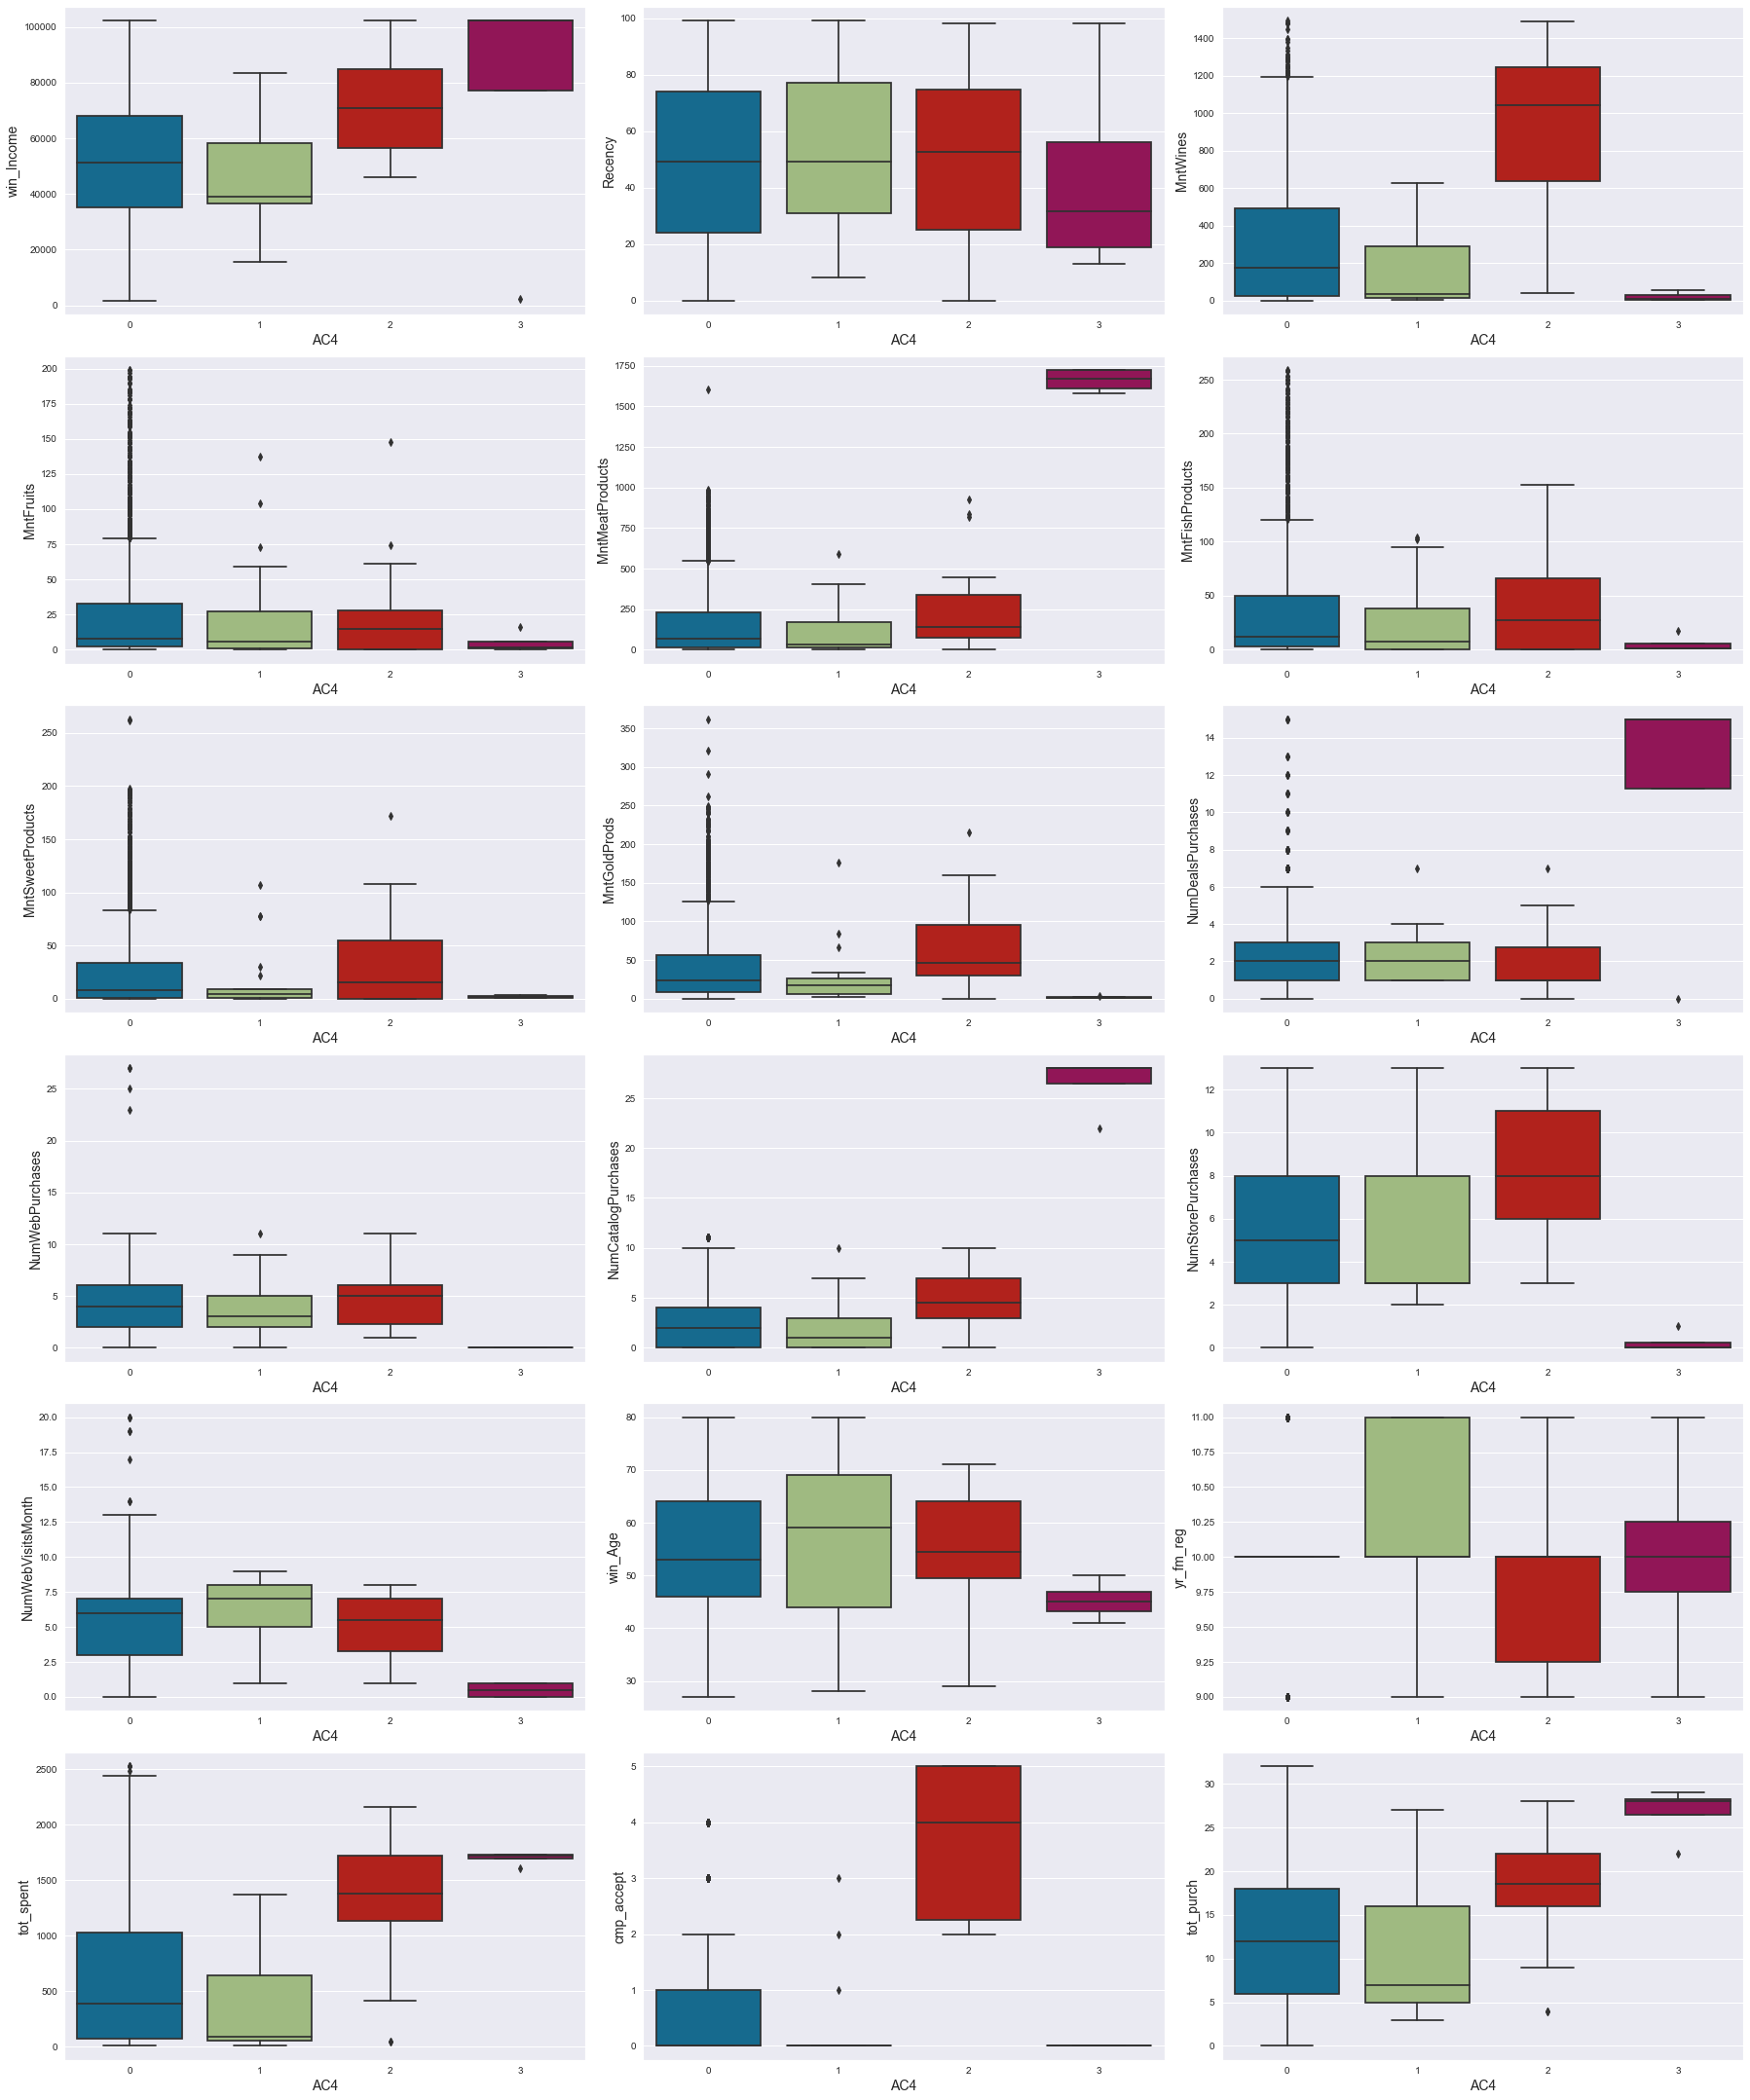

In [128]:
def boxplot():
        n_cols = len(num_cols)
        rows = n_cols // 3 
        _, axes = plt.subplots(ncols=3, nrows=rows, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(num_cols):
            b = sns.boxplot(
                 data=df2clust,
                 y=col,
                 x="AC4",
                 #palette="Paired",
                 ax=axes.reshape(-1)[num])
            b.set_xlabel('AC4', fontsize=14)
            b.set_ylabel(f'{df2clust[col].name}', fontsize=14)
            sns.set_style('darkgrid')
            
boxplot()

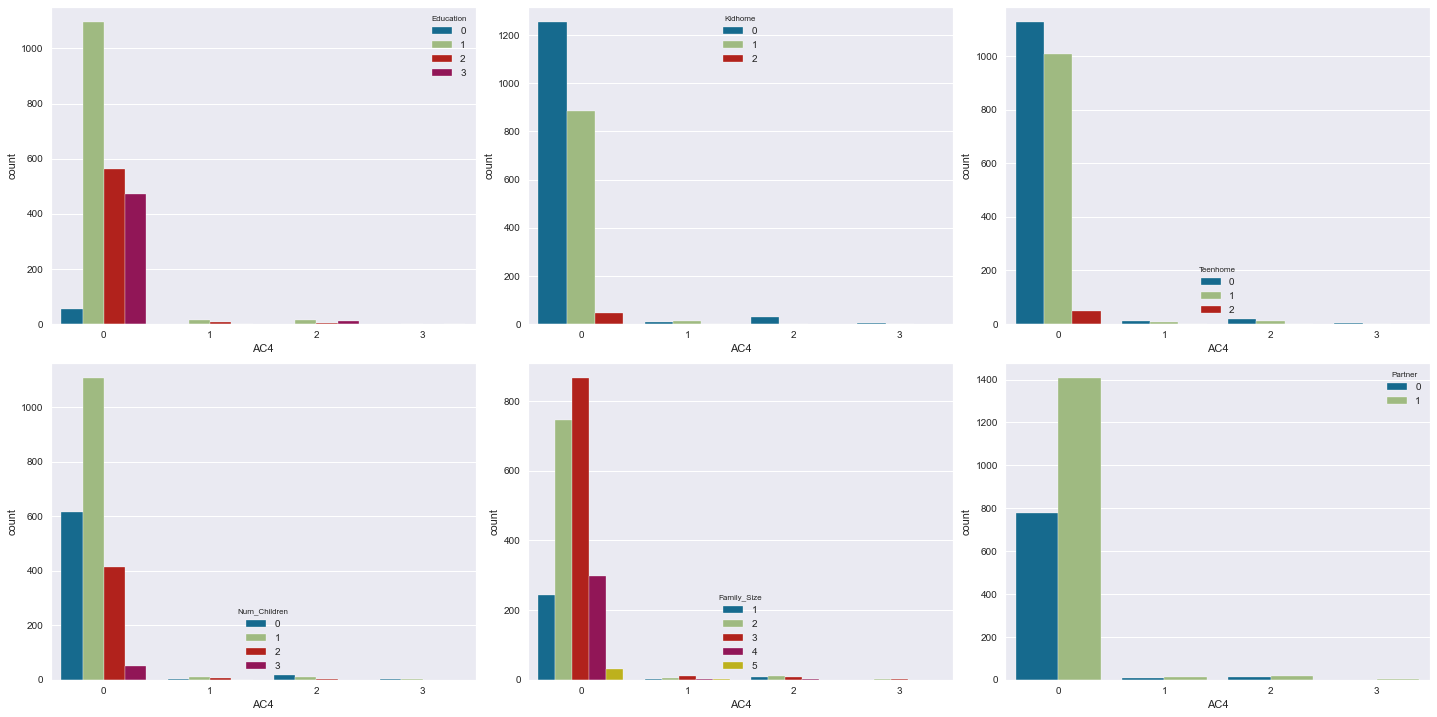

In [129]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax =plt.subplots(2,3)
sns.countplot(df2clust['AC4'], ax=ax[0,0], hue = df2clust["Education"] )
sns.countplot(df2clust['AC4'], ax=ax[0,1], hue = df2clust["Kidhome"] )
sns.countplot(df2clust['AC4'], ax=ax[0,2], hue = df2clust["Teenhome"] )
sns.countplot(df2clust['AC4'], ax=ax[1,0], hue = df2clust["Num_Children"] )
sns.countplot(df2clust['AC4'], ax=ax[1,1], hue = df2clust["Family_Size"] )
sns.countplot(df2clust['AC4'], ax=ax[1,2], hue = df2clust["Partner"] )
fig.show()

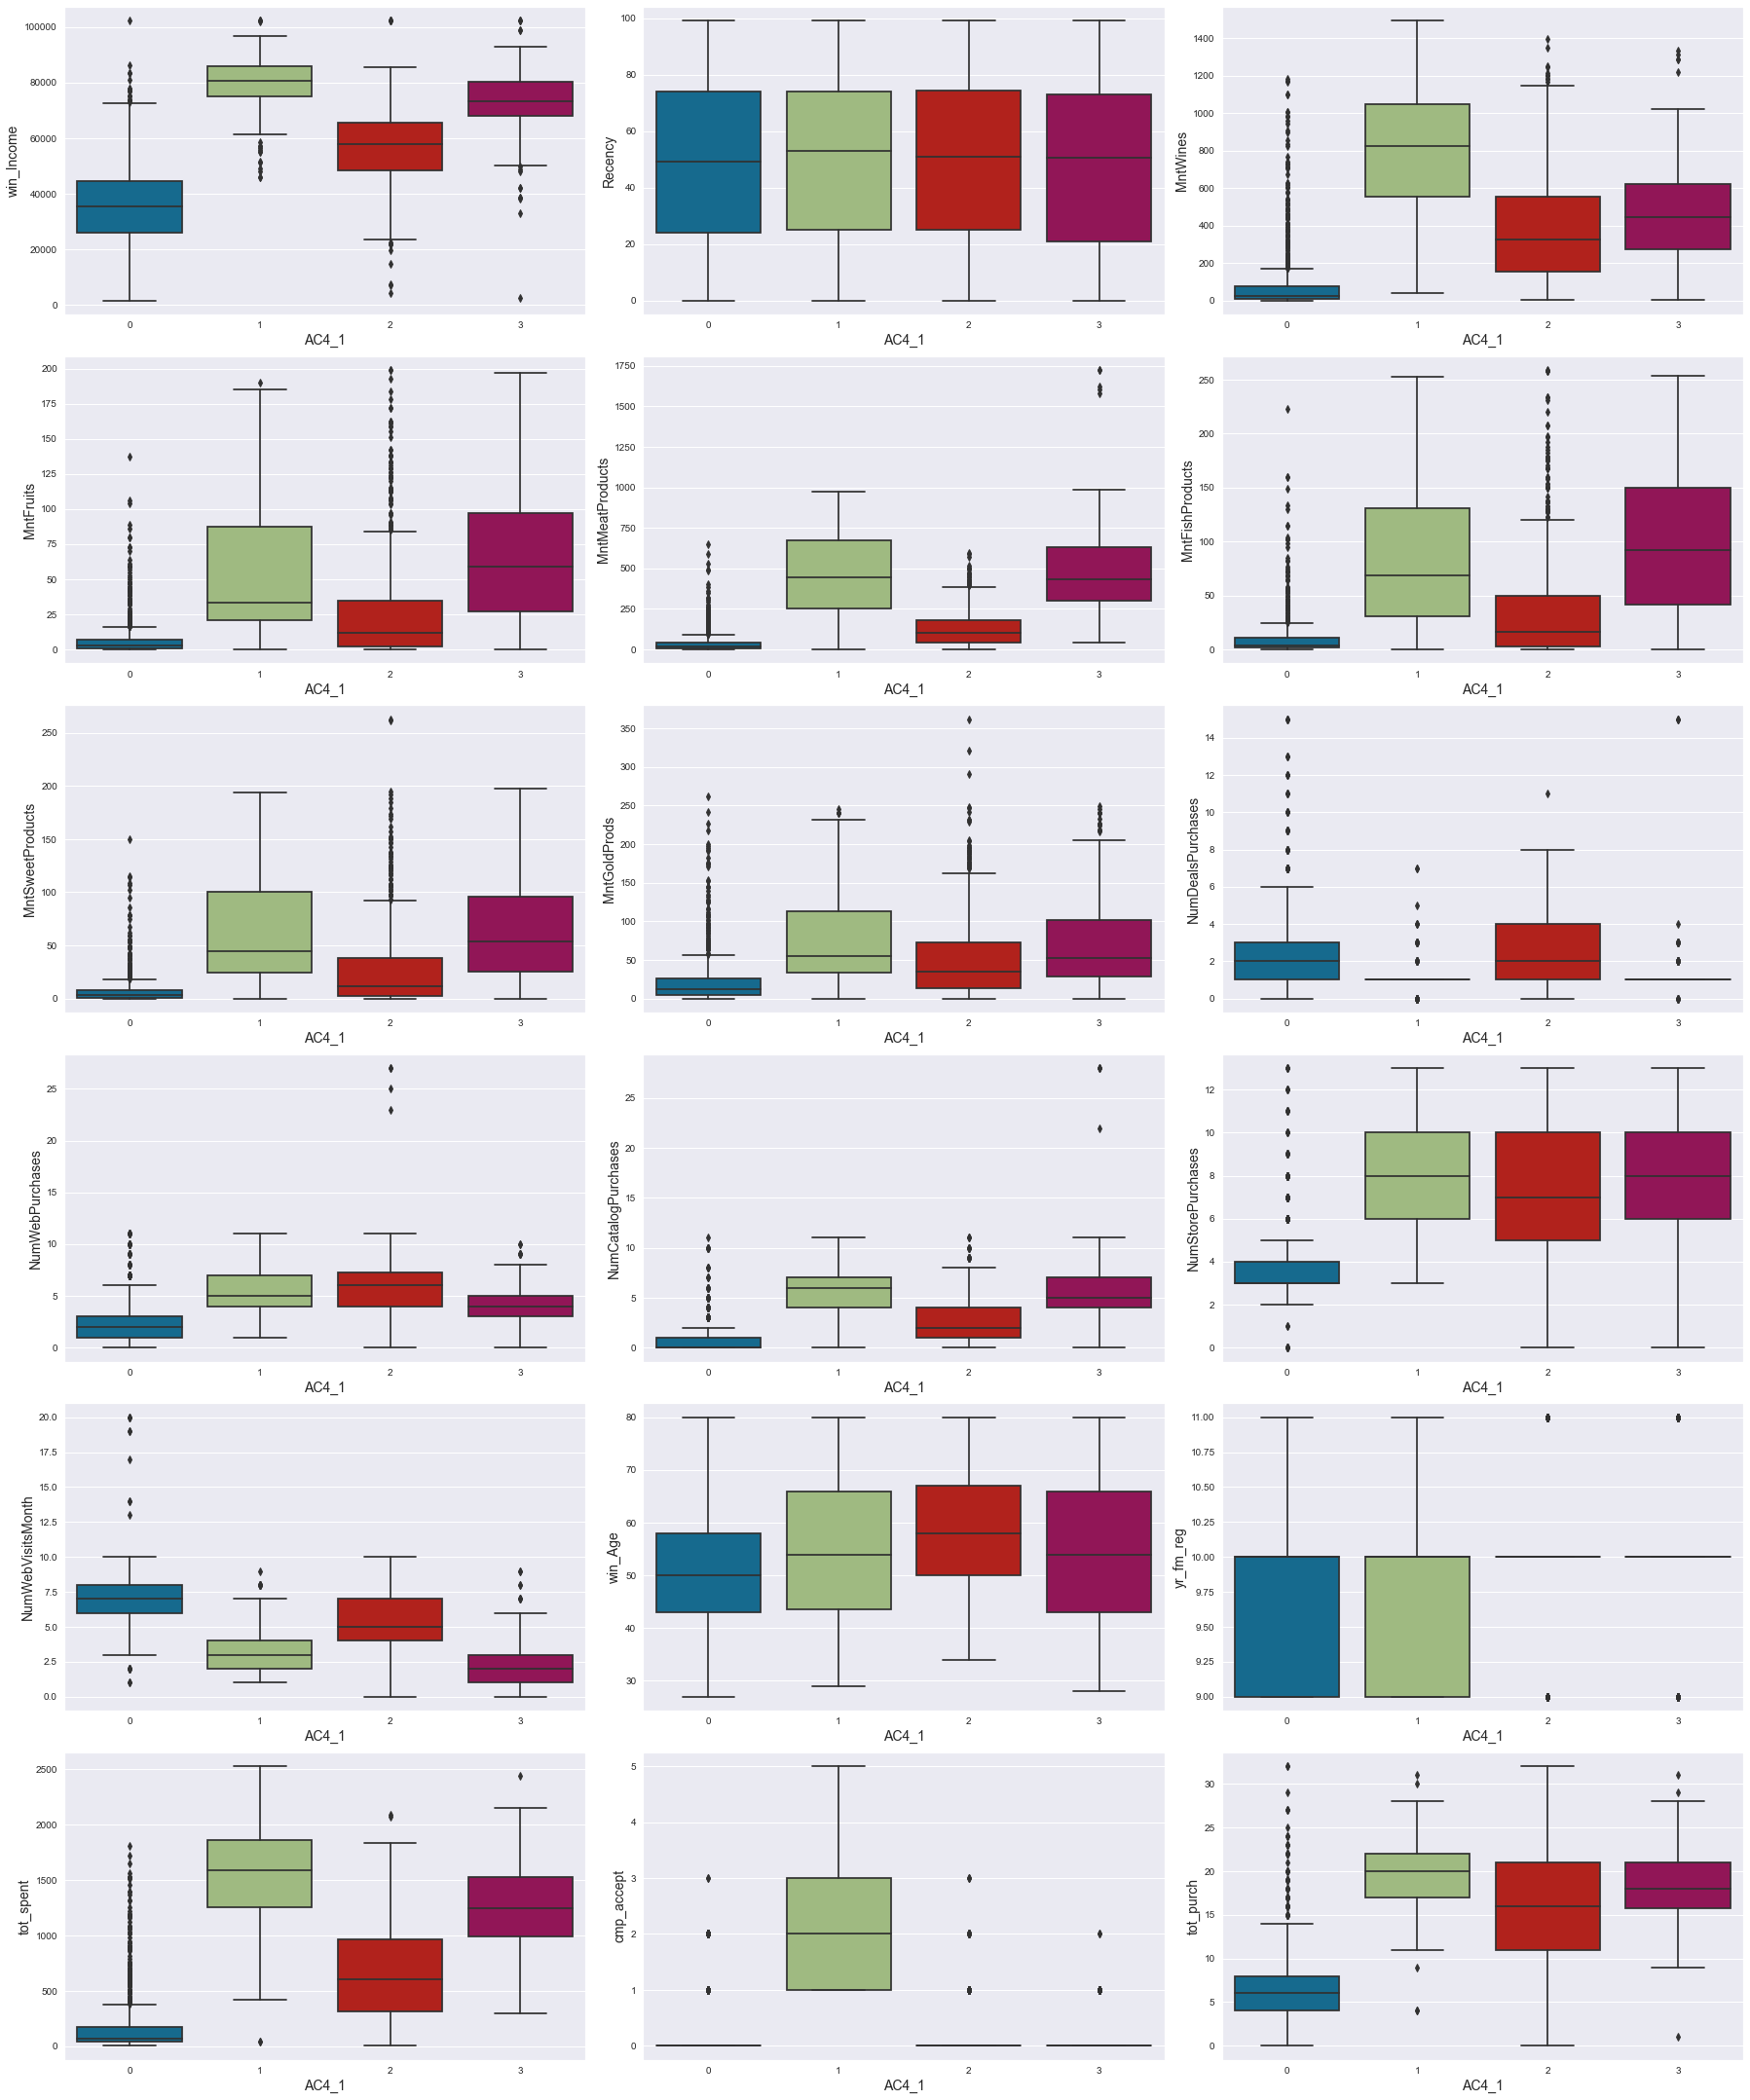

In [130]:
def boxplot():
        n_cols = len(num_cols)
        rows = n_cols // 3 
        _, axes = plt.subplots(ncols=3, nrows=rows, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(num_cols):
            b = sns.boxplot(
                 data=df2clust,
                 y=col,
                 x="AC4_1",
                 #palette="Paired",
                 ax=axes.reshape(-1)[num])
            b.set_xlabel('AC4_1', fontsize=14)
            b.set_ylabel(f'{df2clust[col].name}', fontsize=14)
            sns.set_style('darkgrid')
            
boxplot()

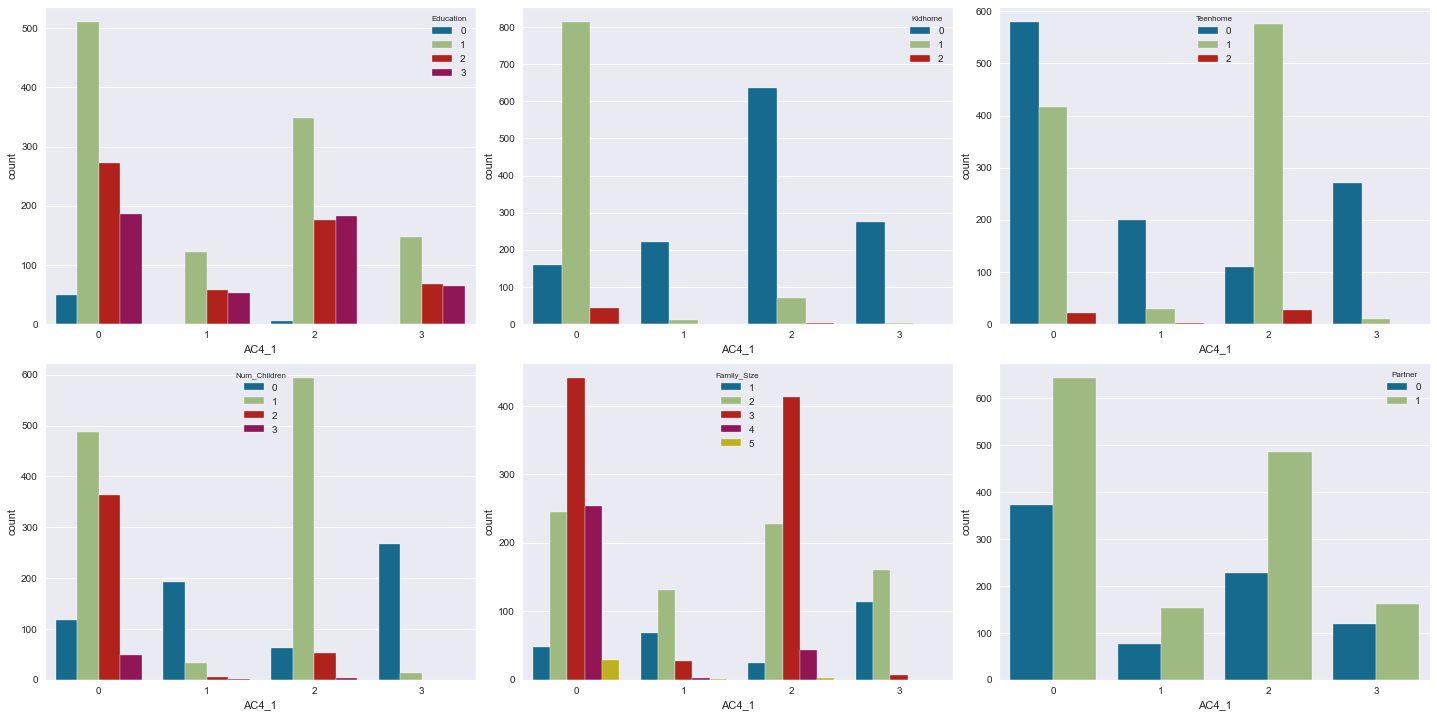

In [131]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax =plt.subplots(2,3)
sns.countplot(df2clust['AC4_1'], ax=ax[0,0], hue = df2clust["Education"] )
sns.countplot(df2clust['AC4_1'], ax=ax[0,1], hue = df2clust["Kidhome"] )
sns.countplot(df2clust['AC4_1'], ax=ax[0,2], hue = df2clust["Teenhome"] )
sns.countplot(df2clust['AC4_1'], ax=ax[1,0], hue = df2clust["Num_Children"] )
sns.countplot(df2clust['AC4_1'], ax=ax[1,1], hue = df2clust["Family_Size"] )
sns.countplot(df2clust['AC4_1'], ax=ax[1,2], hue = df2clust["Partner"] )
fig.show()

In [132]:
PCA_df2["AC4_1"]=df2clust["AC4_1"]

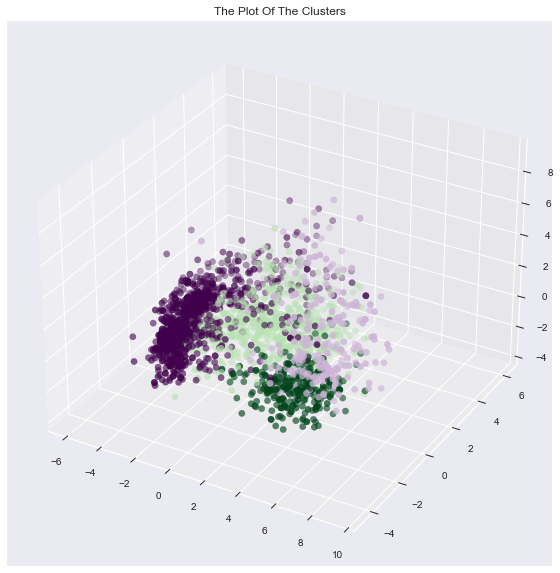

In [133]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df2["AC4_1"], marker='o', cmap = 'PRGn' )
ax.set_title("The Plot Of The Clusters")
plt.show()

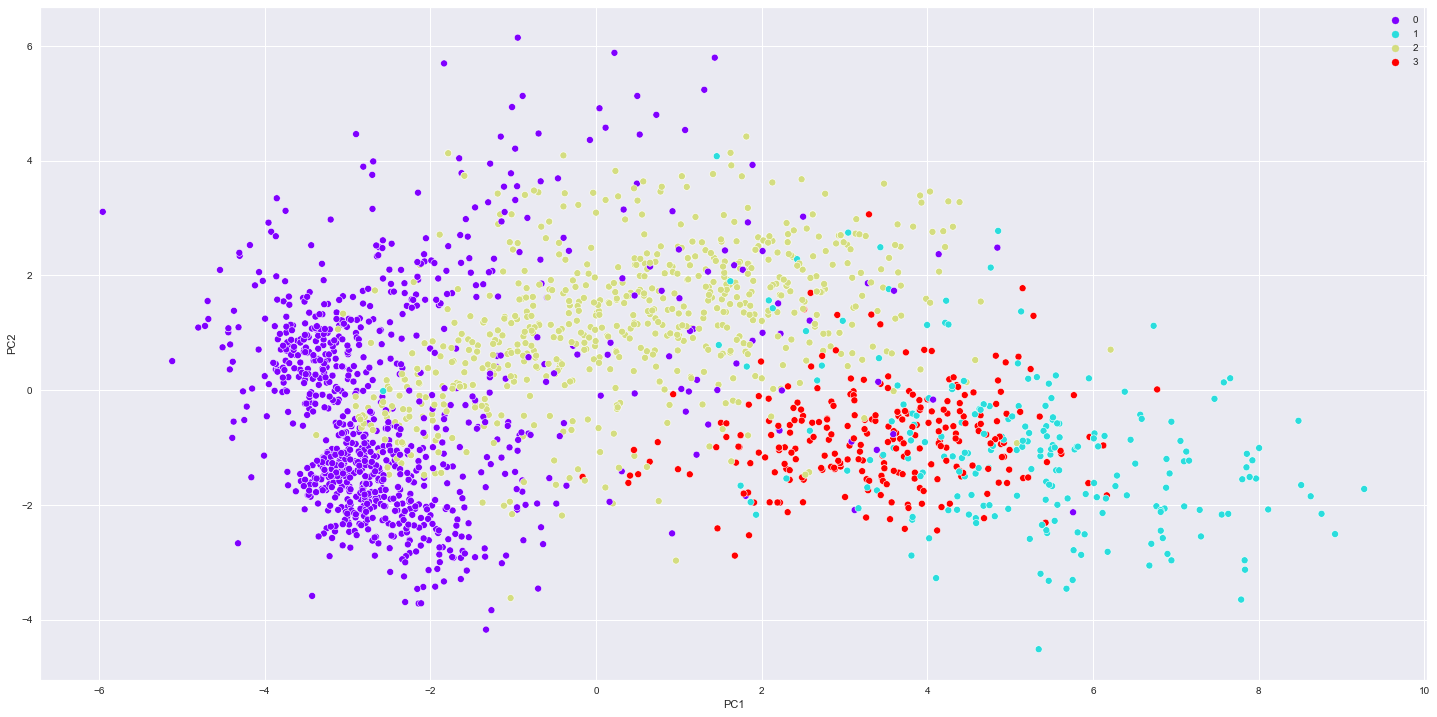

In [134]:
sns.scatterplot(
    data=PCA_df2,
    x="PC1",
    y="PC2",
    hue=df2clust["AC4_1"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

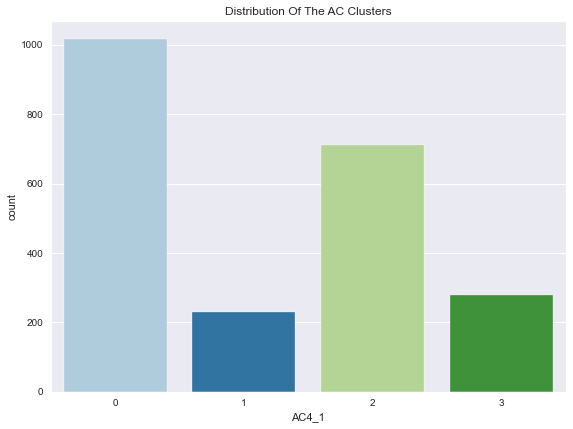

In [135]:
# Countplot of clusters (ward linkage)
plt.figure(figsize=(8,6))
pl = sns.countplot(x=df_ACclust["AC4_1"], palette='Paired' )
pl.set_title("Distribution Of The AC Clusters")
plt.show()

## Model selection summary
* We tested two different modeling approaches
    * on original features
    * on dimension reduced data
    * clusters numbers 4 and 5 
* Hierarchical model did not show enough seggregation of the dataset amongst different clusters
* In comparison, KMeans showed a better seggregation of the sample among different clusters.
* KMeans modeling on the PCA data and on the original data does not require much differnet computing power and results are comparable, hence, PCA based kMeans modeling has been selected.
* Therefore, KMeans, with cluster 4, was chosen as the final model that was run on the original dataset.

# Final Model KMeans with cluster =4

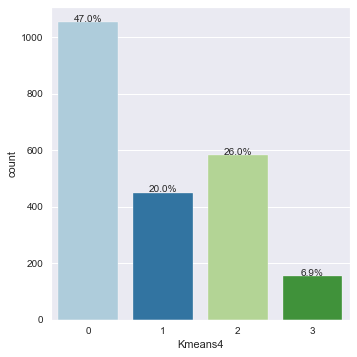

In [136]:
labeled_barplot(df2clust, "Kmeans4", perc=True)

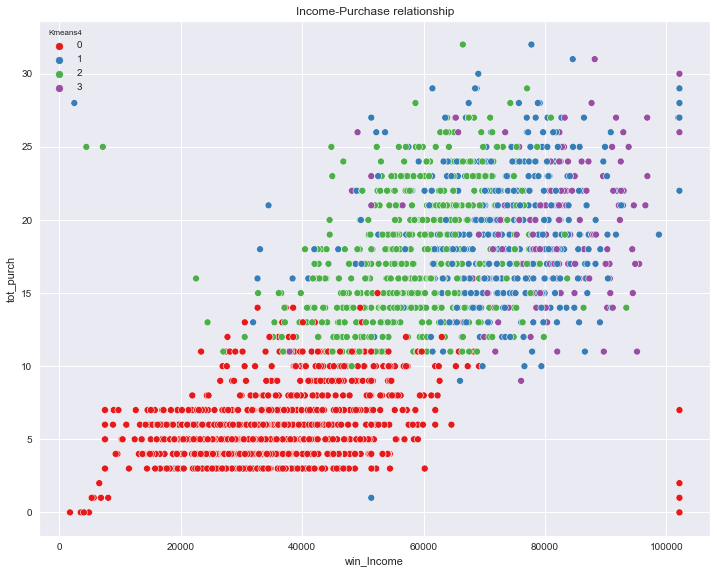

In [137]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = df2clust, x = 'win_Income', y = 'tot_purch', hue = 'Kmeans4', palette='Set1' )
plt.title('Income-Purchase relationship');

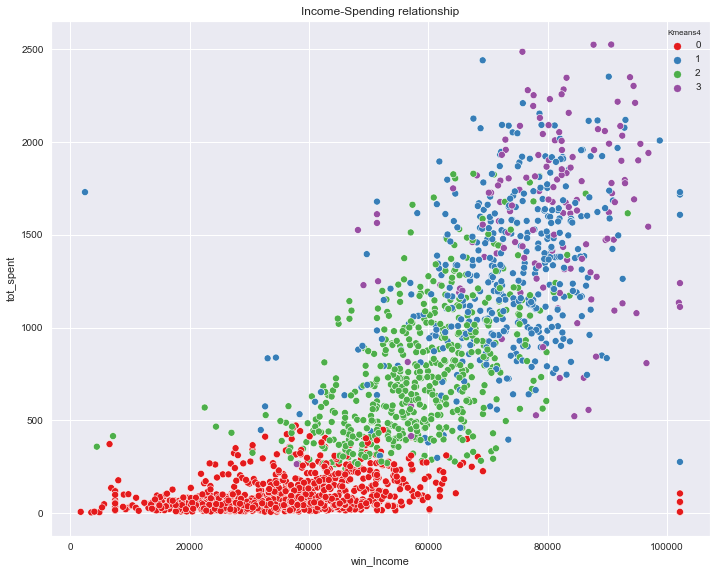

In [138]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = df2clust, x = 'win_Income', y = 'tot_spent', hue = 'Kmeans4', palette='Set1')
plt.title('Income-Spending relationship');

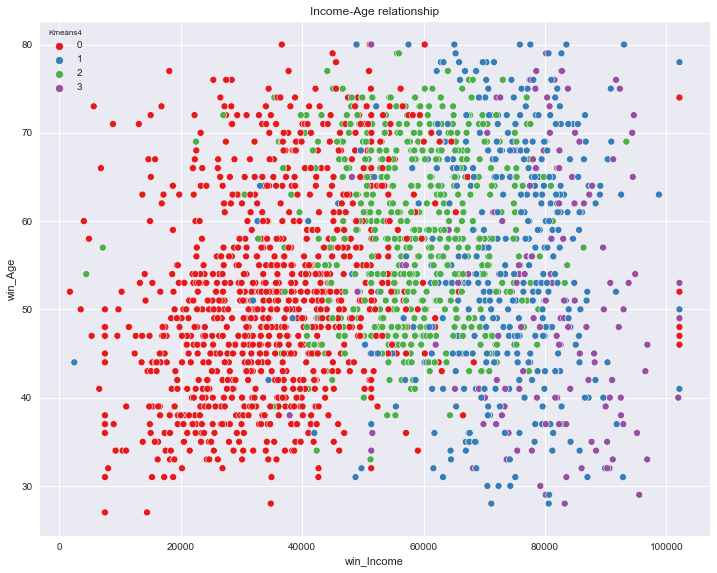

In [139]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = df2clust, x = 'win_Income', y = 'win_Age', hue = 'Kmeans4', palette='Set1')
plt.title('Income-Age relationship');

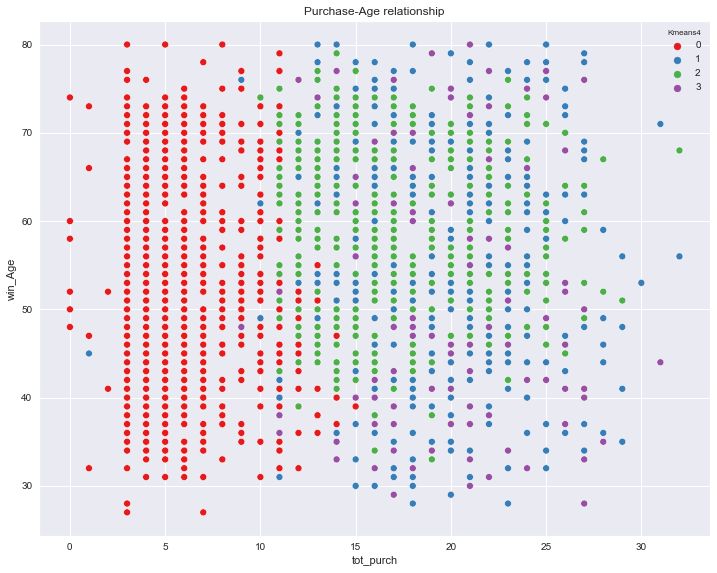

In [140]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = df2clust, x = 'tot_purch', y = 'win_Age', hue = 'Kmeans4', palette='Set1')
plt.title('Purchase-Age relationship');

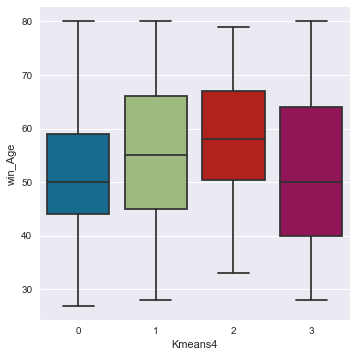

In [141]:
sns.catplot(data=df2clust, y="win_Age", x="Kmeans4", kind="box" )

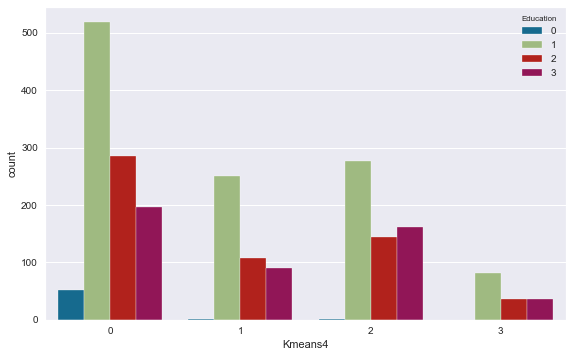

In [142]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=df2clust["Kmeans4"], hue=df2clust["Education"])

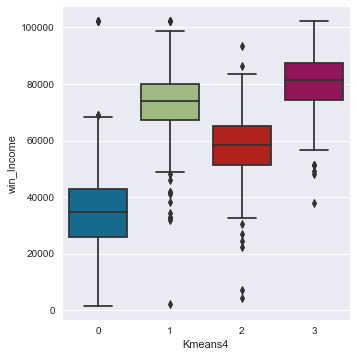

In [143]:
sns.catplot(data=df2clust, y="win_Income", x="Kmeans4", kind="box" )

In [144]:
spend_cols = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']

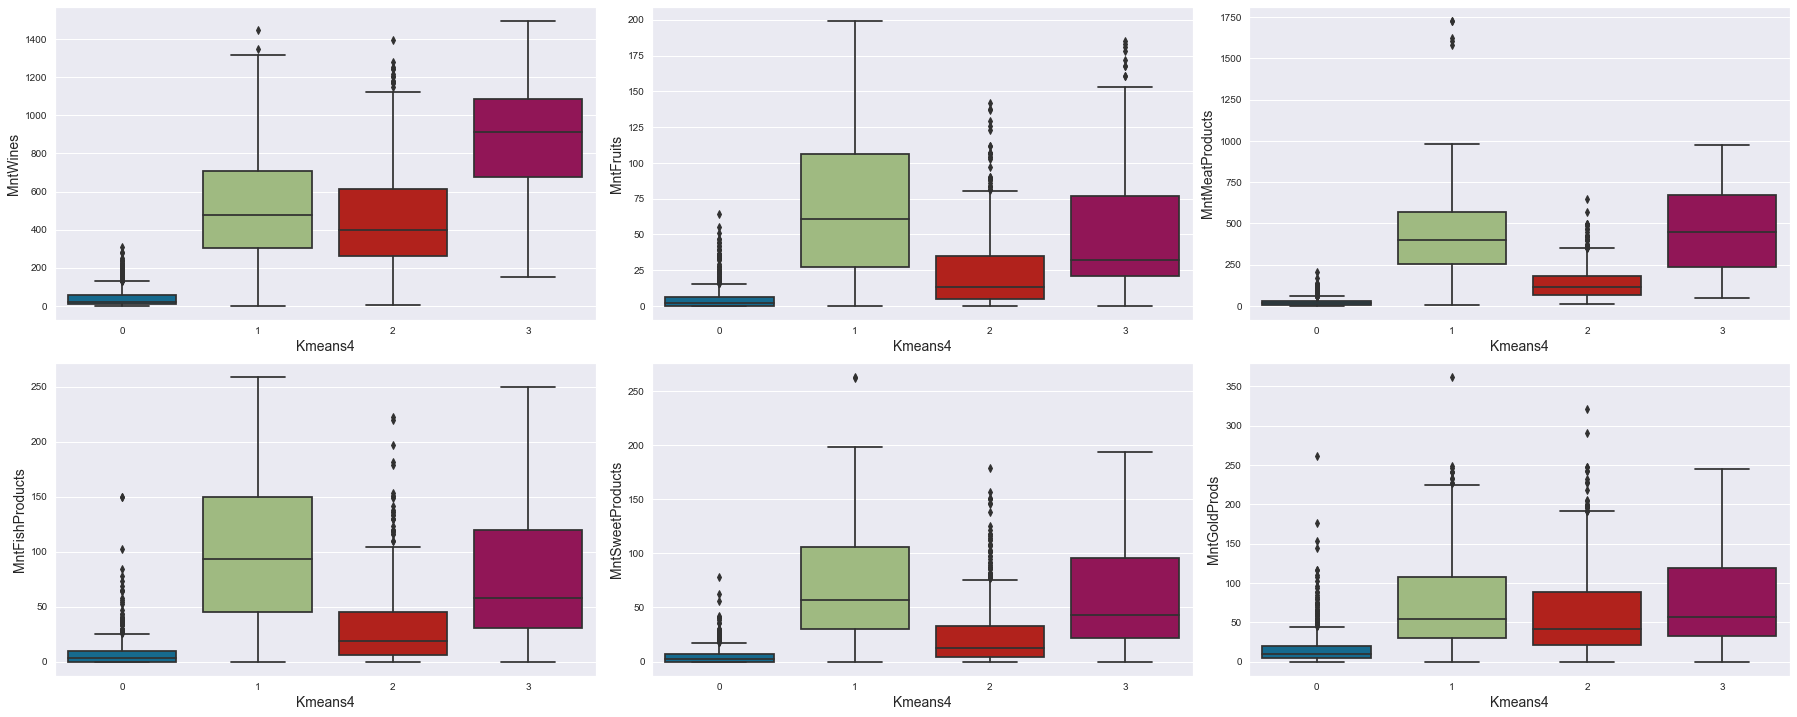

In [145]:
def boxplot():
        n_cols = len(spend_cols)
        rows = n_cols // 3 
        _, axes = plt.subplots(ncols=3, nrows=rows, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(spend_cols):
            b = sns.boxplot(
                 data=df2clust,
                 y=col,
                 x="Kmeans4",
                 #palette="Paired",
                 ax=axes.reshape(-1)[num])
            b.set_xlabel('Kmeans4', fontsize=14)
            b.set_ylabel(f'{df2clust[col].name}', fontsize=14)
            sns.set_style('darkgrid')
            
boxplot()

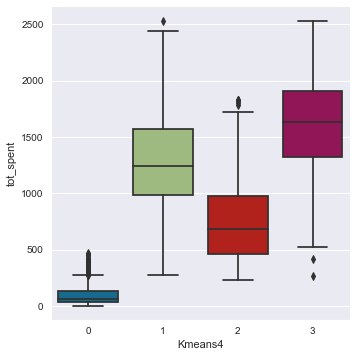

In [146]:
sns.catplot(data=df2clust, y="tot_spent", x="Kmeans4", kind="box" )

In [147]:
purch_cols = ['NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases']

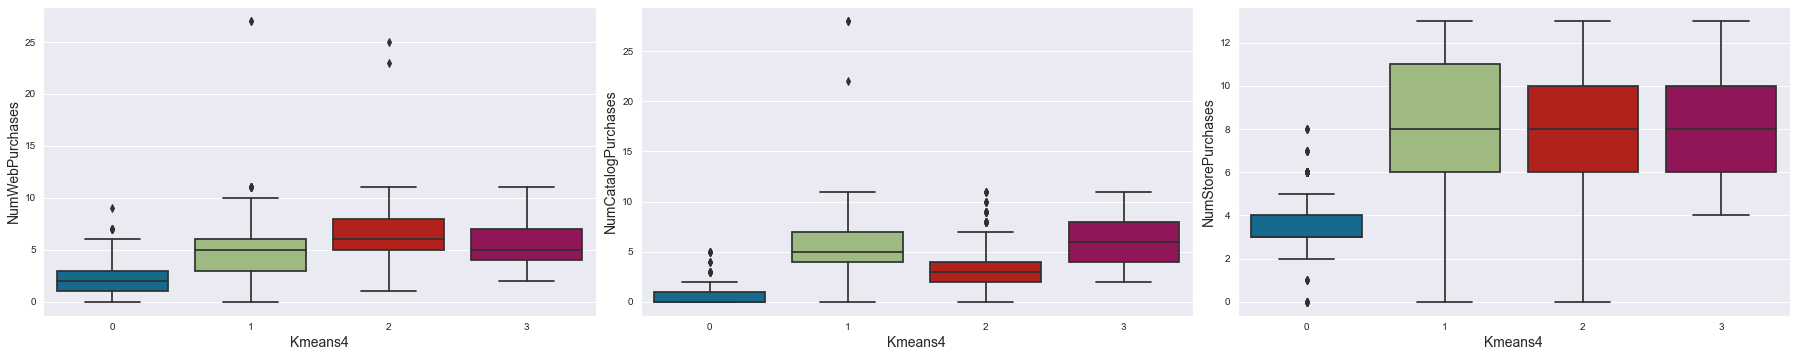

In [148]:
def boxplot():
        n_cols = len(purch_cols)
        rows = n_cols // 3 
        _, axes = plt.subplots(ncols=3, nrows=rows, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(purch_cols):
            b = sns.boxplot(
                 data=df2clust,
                 y=col,
                 x="Kmeans4",
                 #palette="Paired",
                 ax=axes.reshape(-1)[num])
            b.set_xlabel('Kmeans4', fontsize=14)
            b.set_ylabel(f'{df2clust[col].name}', fontsize=14)
            sns.set_style('darkgrid')
            
boxplot()

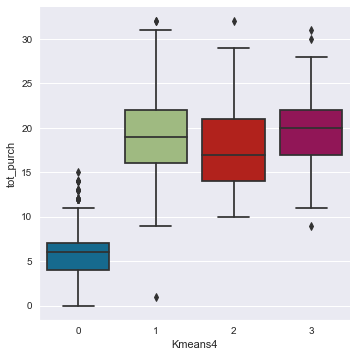

In [149]:
sns.catplot(data=df2clust, y="tot_purch", x="Kmeans4", kind="box" )

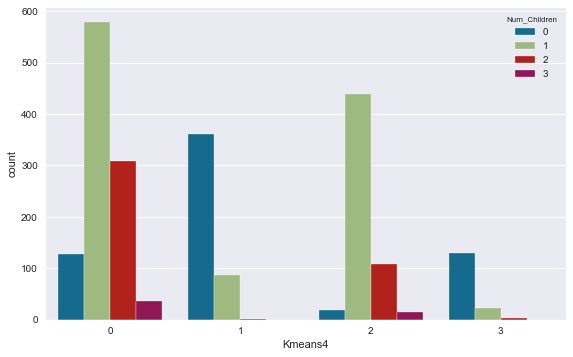

In [150]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=df2clust["Kmeans4"], hue=df2clust["Num_Children"])

# Cluster Analysis Summary 

**It is apparent that income, total spent, and total number of purchases are likely most correlated with the clusters. In addition to that, categorical purchases also made a difference.** 

* The otimized unsupervised clustering provided four groups of customers (four clusters).
* A summary of the groups' characteristics are presented below:


#### Cluster 0
Lowest income group with most Basic Education compared to any other group, and fewest purchases or lowest amount spent. Have thhe largest family compared to the other groups.
 * Most common age is 50-51 years
 * Education is mostly Graduation,2nCycle, Master and PhD with some Basic
 * Most common income is 35000
 * Spends significantly lower than other groups of customers in every category.
 * Have total spending median less than 200.
 * Minimal number of catalog purchases and a few web purchases made.
 * Have total number of purchase lowest of all groups, about 6. 
 * The Number of Children is mostly 1 but 2 is also common and several samples with 3 children.
 
#### Cluster 1
Second highest income group with smallest family size, second highest total spent and second higheest total number of purchases.
 * Most common age is 55-56 years
 * Education is Graduation,2nCycle and Master
 * Most common income is 38000-39000
 * Have spent highest in Sweets, Fish and fruits compared to other clusters.
 * Have total spending with median at about 1250, second highest group in this category.
 * Have made most purchases in StorePurchases but also made considerable catalog purchases, very close second to cluster 3 
 * Total number of purchase median is about 19, second highest of all clusters.
 * The Number of Children is very very few, mostly no child or some with 1 child.
 
#### Cluster 2
Moderate income group with highest age but also has highest web purchases
 * Most common age is 58-59 years
 * In this group there are slightly more PhDs than combined 2ncycle and Masters. Minor number of Basic Education.
 * Most common income is 58000
 * Have spent much less in every category compared to clusters 1 and 3, however, interesting enough that this group's spending on gold although is less than but comparable to the top two clusters i.e., 1 and 3.
 * Have total spending with median of 700.
 * Made most web purchases compared to other groups. Have done some catalog purchases but clearly less than clusters 1 and 3.
 * Have total purchase most commonly at 17.
 * The Number of Children is either 1 or 2.
 
  
#### Cluster 3
This is a select group with highest income, and relatively higher Education (nobody with only Basic Education) 
 * Most common age is 50 years similar to the cluster 1
 * Overall a much smaller population, and does not appear to include anyone with only Basic education
 * This is the highest income group. Median income is about 82000.
 * Have spent highest on Wines, MeatProducts and gold compared to other clusters.
 * Have high total spending (median almost at 1700) and also total purchase (median 20).
 * Have made highest catalog purchases (median ~6). 
 * The Number of Children is 0.

# Recommendations

* This categorization of customers will be helpful for selective / targeted marketing of specialized products. 
* Companies majority customer group spends very little, while a minority group cluster 3 and similar small group cluster 1 together makes up a customer segment that needs to be explored for potential significant expansion area.
    * Products and services need to cater these groups to grow business.
    * Significant profit can be achieved these are groups with more purchase power.
* The cluster number 1 most likely represents customers who could move to either the higher spending or lower spending groups. So, categorizing marketing to the high end and lower spending, these two groups will help in deciding marketing strategy for sustainable growth that will sustain current cluster 0 customers while bringing in more high spending customers.

* It will also be critical in making decisions for a neighborhood based on its customer profile.
    * new store opening, store closing, 
    * online service area expansion,  
    * product availability, and
    * storage.
    
* Its critical to update this dataset with new data as it comes in.
* However, before that its important to test the model with new data
* Some aspects of the dataset makes us curious, e.g., the oldest cluster makes most of the web purchases, there is minimal correlation of the income with the education and age. It would be prudent to learn more about the data and clarify these relationships.
